### HOUSE PRICING

In [1]:
##DATA DESCRIPTION
myfile = open("./house-prices-data/data_description.txt")
txt = myfile.read()
print(txt)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [2]:
#libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
pd.options.mode.chained_assignment = None
import h2o
from scipy.special import expit


import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./house-prices-data/train.csv') 
test = pd.read_csv('./house-prices-data/test.csv')

In [4]:
## DATA CLEANING AND FEATURE ENGINEERING

In [5]:
# Drop the id column from both test and training data
train.drop(['Id'],axis=1, inplace=True)
test.drop(['Id'],axis=1, inplace=True)

In [6]:
print('The shape of train data is {}'.format(train.shape))
print('The shape of test data is {}'.format(test.shape))

The shape of train data is (1460, 80)
The shape of test data is (1459, 79)


In [7]:
#concat both the datasets for easier cleaning 
full = train.append(test, ignore_index=True)

In [8]:
print('The shape of full data is {}'.format(full.shape))

The shape of full data is (2919, 80)


In [9]:
full.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   
2       920       866          0   NaN             3     1Fam       TA   
3       961       756          0   NaN             3     1Fam       Gd   
4      1145      1053          0   NaN             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
0           No       706.0         0.0  ...         WD           0    Pave   
1           Gd       978.0         0.0  ...         WD           0    Pave   
2           Mn       486.0         0.0  ...         WD           0    Pave   
3           No       216.0         0.0  ...         WD           0    Pave   
4           Av       655.0         0.0  ...         WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0             8       856.0     AllPub          0      2003         2003   
1             6      1262.0     AllPub        298      1976         1976   
2             6       920.0     AllPub          0      2001         2002   
3             7       756.0     AllPub          0      1915         1970   
4             9      1145.0     AllPub        192      2000         2000   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 80 columns]

### Cleaning Data Set


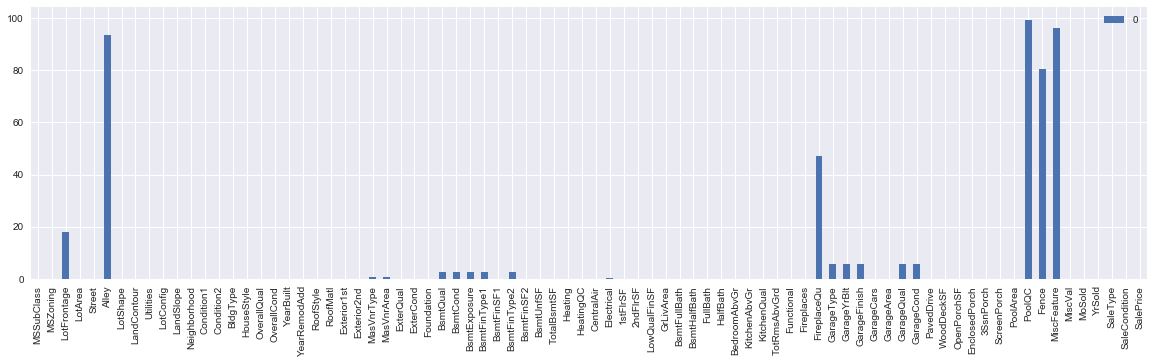

In [10]:
pd.DataFrame(train.isna().sum()*100/train.shape[0]).plot.bar(figsize=(20,5))

* the above plot gives us a summary as percent values for all the variables in the training dataset. 
* For the variables with huge proportion of missing value: Alley, PoolQC, Fence and MiscFeature, it's proper to replace NA value with None. Since None is also a type
* Replaced null values with None in the FireplaceQu column both in test and training set.

In [11]:
## IMPUTING MISSING VALUES

In [12]:
#NA already existing category
full.update(full[['BsmtCond','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtQual','GarageType','GarageQual','GarageFinish','GarageCond','FireplaceQu','MiscFeature','Fence','PoolQC','Alley']].fillna('NA'))

#none a new category generated
full.update(full[['Electrical','MasVnrType']].fillna('None'))



#nan with zero as constant
full.update(full[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtHalfBath','BsmtFullBath','GarageArea','GarageCars','MasVnrArea','TotalBsmtSF']].fillna(0)) #no basement so areas are zero

In [13]:
# Replacing the missing values with medians for the list of variables ['Exterior1st','Exterior2nd','Functional','KitchenQual','MSZoning','SaleType','Utilities']

full['Exterior1st']=full['Exterior1st'].fillna(full.Exterior1st.value_counts().index[0])
full['Exterior2nd']=full['Exterior2nd'].fillna(full.Exterior2nd.value_counts().index[0])
full['Functional']=full['Functional'].fillna(full.Functional.value_counts().index[0])
full['KitchenQual']=full['KitchenQual'].fillna(full.KitchenQual.value_counts().index[0])
full['MSZoning']=full['MSZoning'].fillna(full.MSZoning.value_counts().index[0])
full['SaleType']=full['SaleType'].fillna(full.SaleType.value_counts().index[0])
full['Utilities']=full['Utilities'].fillna(full.Utilities.value_counts().index[0])

In [14]:
#filled missing garage years
full['GarageYrBlt'] = full['GarageYrBlt'].fillna(full['YearBuilt'])

In [15]:
#spillitng the data again

train = full[full['SalePrice'].notnull()]
test = full[full['SalePrice'].isnull()]

In [16]:
train_y = train['SalePrice']
train_x = train.drop(['SalePrice'],axis=1)

In [17]:
test_x = test.drop(['SalePrice'],axis=1)

In [18]:
test_x.shape

(1459, 79)

In [19]:
train_x.shape

(1460, 79)

In [20]:
# Get train LotFrontage dummy variables
LotFrontage_Dummies_df = pd.get_dummies(train_x[['LotFrontage', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood']])

# Get full dummy variables
# Split the data into LotFrontage known and LotFrontage unknown
LotFrontageKnown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].notnull()]
LotFrontageUnknown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].isnull()]

# Training data knowing LotFrontage
LotFrontage_Known_X = LotFrontageKnown.drop(["LotFrontage"], axis = 1)
LotFrontage_Known_y = LotFrontageKnown["LotFrontage"]
# Training data unknown LotFrontage
LotFrontage_Unknown_X = LotFrontageUnknown.drop(["LotFrontage"], axis = 1)
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)
rfr.fit(LotFrontage_Known_X, LotFrontage_Known_y)
rfr.score(LotFrontage_Known_X, LotFrontage_Known_y)

0.9305840449585167

In [21]:
# Predict training data unknown LotFrontage
LotFrontage_Unknown_y = rfr.predict(LotFrontage_Unknown_X)
train_x.loc[train_x["LotFrontage"].isnull(), "LotFrontage"] = LotFrontage_Unknown_y

In [22]:
# Repeat same process for test data
# Get train LotFrontage dummy variables
LotFrontage_Dummies_df = pd.get_dummies(test_x[['LotFrontage', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood']])

# Get full dummy variables
# Split the data into LotFrontage known and LotFrontage unknown
LotFrontageKnown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].notnull()]
LotFrontageUnknown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].isnull()]

# Testing data knowing LotFrontage
LotFrontage_Known_X = LotFrontageKnown.drop(["LotFrontage"], axis = 1)
LotFrontage_Known_y = LotFrontageKnown["LotFrontage"]
# Testing data unknown LotFrontage
LotFrontage_Unknown_X = LotFrontageUnknown.drop(["LotFrontage"], axis = 1)
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)
rfr.fit(LotFrontage_Known_X, LotFrontage_Known_y)
rfr.score(LotFrontage_Known_X, LotFrontage_Known_y)

0.9456107979297688

In [23]:
# Predict testing data unknown LotFrontage
LotFrontage_Unknown_y = rfr.predict(LotFrontage_Unknown_X)
test_x.loc[test_x["LotFrontage"].isnull(), "LotFrontage"] = LotFrontage_Unknown_y

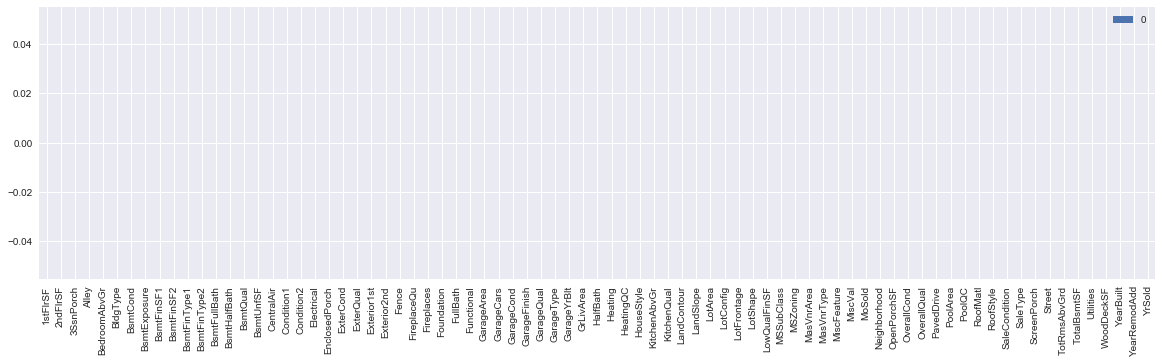

In [24]:
pd.DataFrame(train_x.isna().sum()*100/train_x.shape[0]).plot.bar(figsize=(20,5))

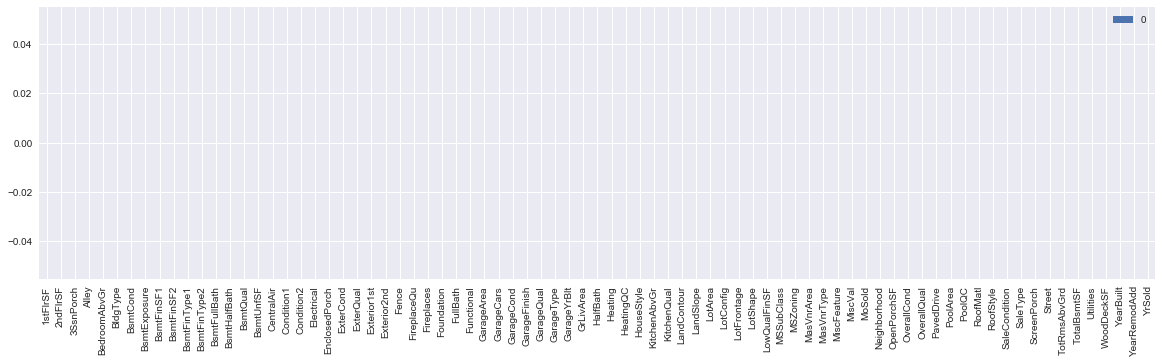

In [25]:
pd.DataFrame(test_x.isna().sum()*100/test_x.shape[0]).plot.bar(figsize=(20,5))

* We can see the data is totally clean and now we can do the feature engineering

### FEATURE ENGINEERING 

In [26]:
#converting years into age 
currentYear = datetime.now().year

In [27]:
train_x['Age_House']=currentYear-train_x['YearBuilt']
train_x['Age_Renovation']=currentYear-train_x['YearRemodAdd']
train_x['Garage_age']=currentYear-train_x['GarageYrBlt']
train_x = train_x.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

In [28]:
test_x['Age_House']=currentYear-test_x['YearBuilt']
test_x['Age_Renovation']=currentYear-test_x['YearRemodAdd']
test_x['Garage_age']=currentYear-test_x['GarageYrBlt']
test_x = test_x.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

In [29]:
train_data = pd.concat([train_y, train_x], axis=1)

## EDA

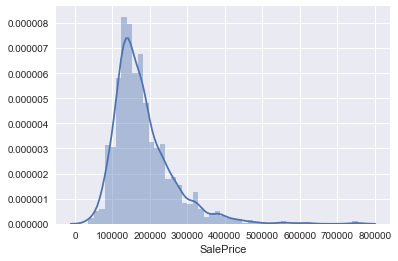

In [30]:
sns.distplot(train_y)

#Deviate from the normal distribution.
#Have appreciable positive skewness.

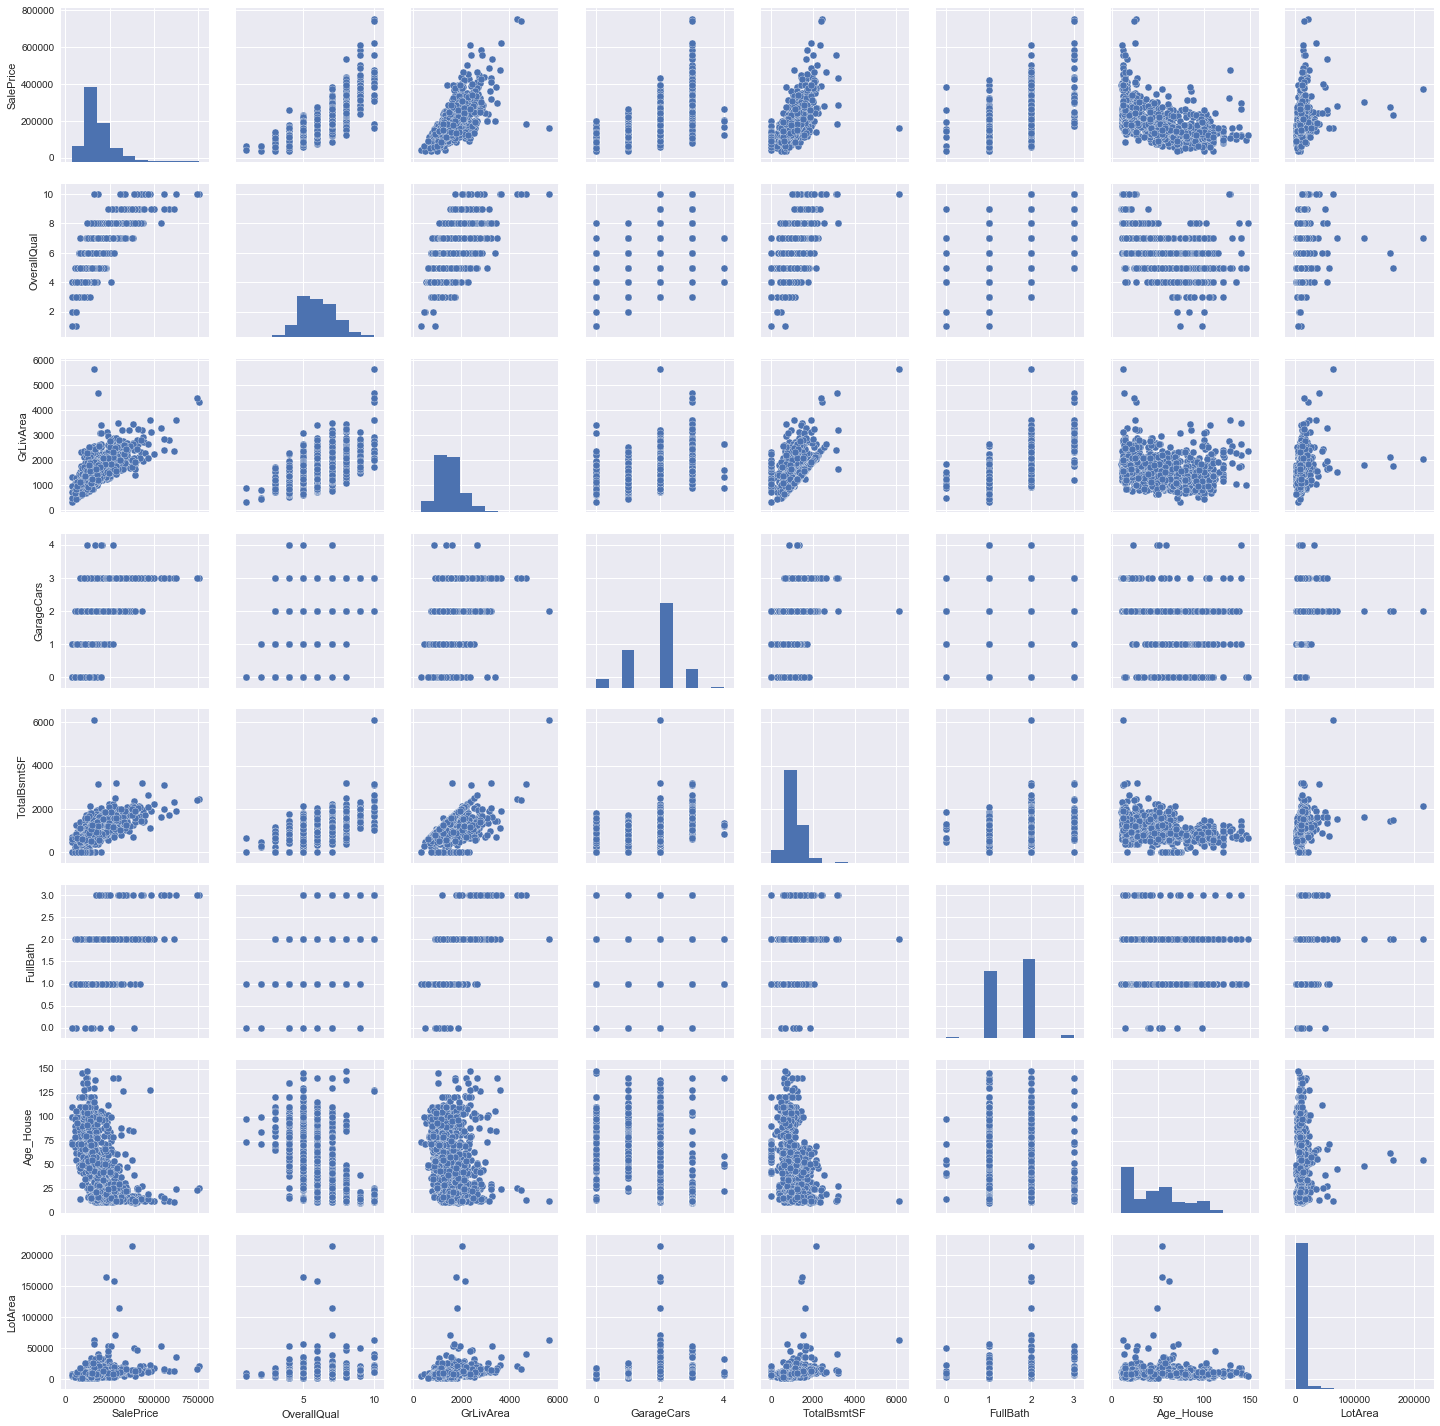

In [31]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'Age_House','LotArea']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

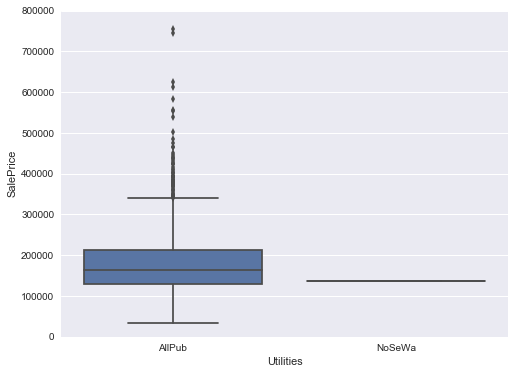

In [32]:
#box plot overallqual/saleprice
var = 'Utilities'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

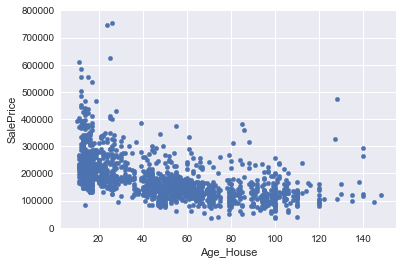

In [33]:
train_data.plot.scatter(x='Age_House', y='SalePrice', ylim=(0,800000))

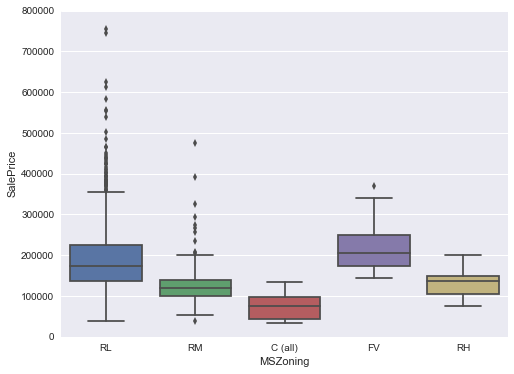

In [34]:
#box plot overallqual/saleprice
var = 'MSZoning'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

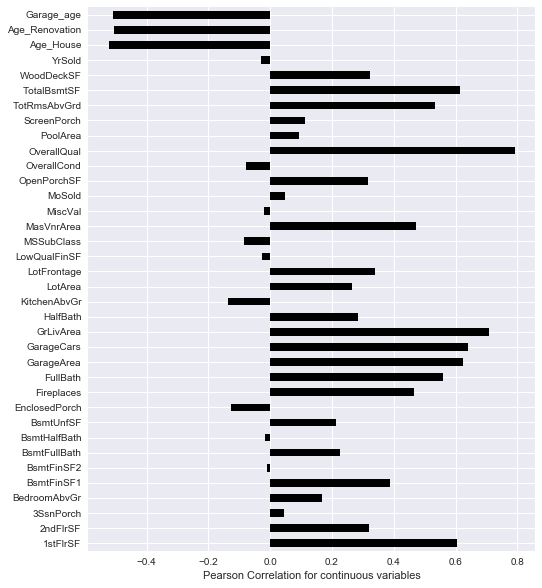

In [35]:
result = pd.concat([train_x, train_y], axis=1)
Corr = result.corr().iloc[:-1,-1]

fig, ax_ = plt.subplots(figsize=(8, 10))
_ =  Corr.plot(kind='barh', ax=ax_, colormap='gnuplot')
_ = ax_.set_xlabel('Pearson Correlation for continuous variables')

## BASIC DEFUALT GBM MODEL

In [36]:
#DIVIDING THE TEST DATASET INTO TWO PARTS
#So we can do the grid search CV to find the best parameters

In [37]:
y_name = 'SalePrice'
x_names = list(train_data.columns.values)
x_names= x_names.remove('SalePrice')

predictors = x_names
response = "SalePrice"

In [38]:
from sklearn.model_selection import train_test_split
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
SEED                    = 1111   # global random seed for better reproducibility

h2o.init(max_mem_size='24G', nthreads=4) # start h2o with plenty of memory and threads
h2o.remove_all()                         # clears h2o memory
h2o.no_progress()                        # turn off h2o progress indicators  

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         25 mins 24 secs
H2O_cluster_timezone:       America/Los_Angeles
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.0.5
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_vibhz_sxmxgj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    21.07 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.4 final
--------------------------  ------------------------------------------------------------------

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.30, random_state=1111)

In [40]:
X_train = pd.concat([X_train, y_train], axis=1)
X_valid = pd.concat([X_valid, y_valid], axis=1)
X_train_hf = h2o.H2OFrame(X_train)
X_valid_hf = h2o.H2OFrame(X_valid)

In [41]:
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=X_train_hf)

In [42]:
#print(gbm)

In [43]:
perf = gbm.model_performance(X_valid_hf)
print(perf)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 589706080.4721779
RMSE: 24283.8646115518
MAE: 16085.176332188526
RMSLE: 0.12541715754244864
Mean Residual Deviance: 589706080.4721779



In [44]:
## Cross Validation

In [45]:
cv_gbm = H2OGradientBoostingEstimator(nfolds = 4, seed = 1111)
cv_gbm.train(x = predictors, y = response, training_frame = X_train_hf.rbind(X_valid_hf))

In [46]:
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
perf_cv = cv_gbm.model_performance(xval=True)

In [47]:
cv_summary

mean            sd   cv_1_valid  \
0                     mae   16343.829      900.4629    16032.934   
1  mean_residual_deviance  8.127897E8  2.32672032E8  8.0080019E8   
2                     mse  8.127897E8  2.32672032E8  8.0080019E8   
3                      r2   0.8703117   0.031058317   0.87752736   
4       residual_deviance  8.127897E8  2.32672032E8  8.0080019E8   
5                    rmse    28263.62      4313.941    28298.414   
6                   rmsle  0.13604365   0.011073598   0.13795003   

     cv_2_valid   cv_3_valid    cv_4_valid  
0     17062.436    17071.729     15208.218  
1  1.03636858E9  9.1900038E8  4.94989664E8  
2  1.03636858E9  9.1900038E8  4.94989664E8  
3    0.86715317    0.8307093     0.9058569  
4  1.03636858E9  9.1900038E8  4.94989664E8  
5      32192.68     30315.02     22248.363  
6    0.12571527   0.15079264    0.12971663

In [48]:
perf_cv


ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 819515289.5238277
RMSE: 28627.177463449443
MAE: 16370.066795262981
RMSLE: 0.13618789137076293
Mean Residual Deviance: 819515289.5238277


### GBM MODEL WITH FEW HYPERPARAMETERS TO GET A SENSE OF MODEL PERFORMANCE

In [49]:
#Gradient Boosting Machine (GBM)

# Prepare the hyperparameters
gbm_params = { 
                'max_depth':list(range(2,30,1))
                }



# Prepare the grid object
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,   # Model to be trained
                          grid_id='gbm_grid1',                  # Grid Search ID
                          hyper_params=gbm_params,              # Dictionary of parameters
                          search_criteria={"strategy": "Cartesian"}   # RandomDiscrete
                          )

# Train the Model
gbm_grid.train(x=predictors,y=response, 
                training_frame=X_train_hf, 
               validation_frame=X_valid_hf,
                ntrees=10000,      # Specify other GBM parameters not in grid
                score_tree_interval=5,     # For early stopping
                stopping_rounds=3,         # For early stopping
                stopping_tolerance=0.0005,
                seed=1)

In [50]:
# Find the Model grid performance 
gbm_gridperf = gbm_grid.get_grid(sort_by='RMSE',decreasing = False)
gbm_gridperf

     max_depth           model_ids                rmse
0            3   gbm_grid1_model_2   23811.76467273158
1            4   gbm_grid1_model_3  24067.757944000332
2            2   gbm_grid1_model_1   24162.34482149727
3            5   gbm_grid1_model_4  24438.086720645068
4            6   gbm_grid1_model_5  24880.292040748634
5           13  gbm_grid1_model_12  25049.746845450565
6           10   gbm_grid1_model_9   25157.98163747442
7           12  gbm_grid1_model_11  25189.581235384725
8           11  gbm_grid1_model_10   25278.01048519597
9            8   gbm_grid1_model_7  25349.952806277804
10          23  gbm_grid1_model_22   25437.31834726873
11          18  gbm_grid1_model_17   25439.03642174575
12          21  gbm_grid1_model_20  25440.095758350915
13          14  gbm_grid1_model_13   25446.70077512613
14          17  gbm_grid1_model_16  25448.056206153415
15          22  gbm_grid1_model_21   25468.79176536759
16          28  gbm_grid1_model_27  25482.897617496325
17        

In [51]:
#It appears that the max depth of 2 to 13 are best suited

## GBM ACTUAL MODEL

In [52]:
# Prepare the hyperparameters
params = {  
                'learn_rate': [0.01, 0.1], 
                'max_depth': list(range(2,13,2)),
                'sample_rate': [0.6,0.7,0.8,0.9], 
                'col_sample_rate': [0.6,0.7,0.8,0.9]
                }


# Prepare the grid object
grid = H2OGridSearch(model=H2OGradientBoostingEstimator,   # Model to be trained
                          grid_id='gbm_grid1',                  # Grid Search ID
                          hyper_params=params,              # Dictionary of parameters
                          search_criteria={"strategy": "Cartesian"}   # RandomDiscrete
                          )

# Train the Model
grid.train(x=predictors,y=response, 
                training_frame=X_train_hf, 
               validation_frame=X_valid_hf,
                ntrees=10000,      # Specify other GBM parameters not in grid
                score_tree_interval=5,     # For early stopping
                stopping_rounds=3,         # For early stopping
                stopping_tolerance=0.0005,
                seed=1)

In [53]:
# Identify the best model generated with least error
sorted_final_grid = grid.get_grid(sort_by='RMSE',decreasing = False)

In [75]:
##Using the parameters of the trained model on the whole trainig set and getting the model coeff.   

gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])

params = gbm.params
 
gbm_best = H2OGradientBoostingEstimator()

X_train = h2o.H2OFrame(train_data)
gbm_best.train(x=predictors, y=response, training_frame=X_train_hf.rbind(X_valid_hf))       

In [76]:
preds_valid = gbm_best.predict(X_train_hf.rbind(X_valid_hf))
preds_valid.head(5)

predict 
 
 
 160591 
 345352 
 300227 
 295184 
 254628

In [77]:
print(gbm_best.model_performance())


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 172251906.93140787
RMSE: 13124.477396506418
MAE: 8949.43018782106
RMSLE: 0.07979275642688735
Mean Residual Deviance: 172251906.93140787



In [78]:
X_test_hf = h2o.H2OFrame(test_x)
preds = gbm_best.predict(X_test_hf)
preds.head(5)

predict 
 
 
 125972 
 153824 
 187439 
 189278 
 187053

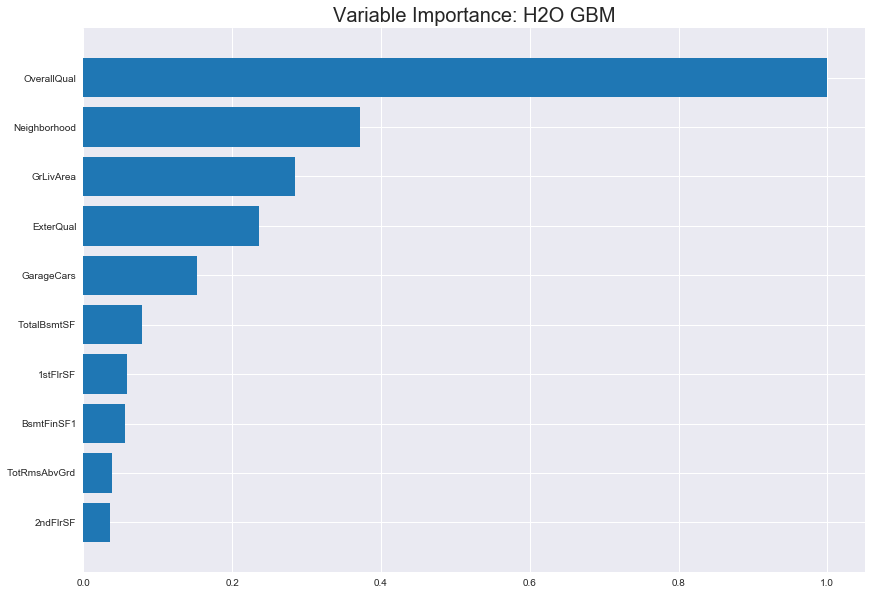

In [79]:
best_model.varimp_plot()

In [80]:
contributions = gbm_best.predict_contributions(X_test_hf)
contributions.head(5)

1stFlrSF 2ndFlrSF 3SsnPorch Alley BedroomAbvGr BldgType BsmtCond BsmtExposure BsmtFinSF1 BsmtFinSF2 BsmtFinType1 BsmtFinType2 BsmtFullBath BsmtHalfBath BsmtQual BsmtUnfSF CentralAir Condition1 Condition2 Electrical EnclosedPorch ExterCond ExterQual Exterior1st Exterior2nd Fence FireplaceQu Fireplaces Foundation FullBath Functional GarageArea GarageCars GarageCond GarageFinish GarageQual GarageType GrLivArea HalfBath Heating HeatingQC HouseStyle KitchenAbvGr KitchenQual LandContour LandSlope LotArea LotConfig LotFrontage LotShape LowQualFinSF MSSubClass MSZoning MasVnrArea MasVnrType MiscFeature MiscVal MoSold Neighborhood OpenPorchSF OverallCond OverallQual PavedDrive PoolArea PoolQC RoofMatl RoofStyle SaleCondition SaleType ScreenPorch Street TotRmsAbvGrd TotalBsmtSF Utilities WoodDeckSF YrSold Age_House Age_Renovation Garage_age BiasTerm 
 
 
 -2384.18 -963.169 0 0 -262.224 -13.5684 127.617 -634.346 907.608 0 -1056.63 0 -649.845 0 -425.57 92.2353 378.974 -1494.24 71.5241 0 8.44712 31.8906 -1583.35 42.8213 158.971 0 -1212.39 -129.729 11.9391 -133.776 108.116 1659.26 -2529.9 135.316 -741.006 299.349 447.407 -13961.8 -189.394 0 -7.14043 -94.316 22.7318 -1580.14 106.261 0 1703.15 -163.979 135.889 11.7653 0 8.68924 -839.343 -1.97732 -48.6011 0 0 50.1876 -4126.28 -450.205 987.689 -22783.4 48.7404 0 0 -24.3762 4.50289 506.2 -173.906 -59.1804 0 -494.927 -1767.3 0 -340.525 22.4811 75.075 -1766.24 -24.8632 180919 
 2634.07 -654.098 0 0 -11.4099 10.8063 224.919 -822.527 2221.94 0 1183.93 0 -633.122 0 -399.458 61.9523 206.827 177.41 72.3969 0 2.11058 24.1579 -1303 -948.592 -144.165 0 -1785.25 -67.6608 9.09519 -133.776 77.9345 -897.162 -2934.86 62.5019 -997.742 237.889 364.486 -8431.76 207.139 0 -7.14043 -52.0416 10.0674 1436.22 69.9216 0 5622.31 275.958 84.7638 -46.4868 0 13.5943 39.9218 6.56317 -71.3151 0 0 16.1486 -7407.26 -369.241 1287.06 -18188.9 36.7297 0 0 -37.7146 -11.3897 496.798 -208.582 -127.984 0 -153.193 2382.11 0 1490.45 22.4811 256.817 -1567.4 -9.97599 180919 
 -1207.55 709.317 0 0 -29.052 -17.7181 105.398 -1044.13 3886.1 0 819.901 0 -730.822 0 -370.384 175.3 180.707 311.038 72.7387 0 2.11058 14.3042 -754.492 41.2812 77.6443 0 1622.63 -109.12 14.0905 -7.83521 183.23 -468.71 108.411 238.982 2206.62 123.416 866.32 5397.44 125.53 0 -3.83355 25.4451 98.1426 -3042.44 81.488 0 4848.65 -154.843 -88.3712 -35.0707 0 -32.8916 40.1482 -1.18052 -102.553 0 0 -17.1317 8233.03 61.4186 -1337.51 -16083.2 25.1548 0 0 -37.7146 9.09301 197.653 -360.335 -119.079 0 -43.4466 -2269.08 0 1311.77 22.4811 911.815 1833 6.2402 180919 
 -1292.05 799.836 0 0 -15.1867 -4.32504 49.4953 -963.182 291.255 0 1500.44 0 -838.366 0 -366.767 148.106 143.849 471.606 72.749 0 2.11058 11.7697 -1143.44 157.904 56.926 0 1122.53 -106.933 23.4873 -6.23451 59.9113 -348.332 892.266 69.9976 2099.81 128.76 314.419 3789.17 176.255 0 7.42749 25.4451 22.5776 2194.78 29.5646 0 -218.28 -154.843 9.83903 -35.0707 0 -32.8916 71.516 26.5696 -4.83841 0 0 2.19783 8050.34 -188.967 1041.84 -11833.7 25.1548 0 0 -37.7146 9.09301 168.218 -324.276 -178.141 0 -119.928 -2386.67 0 1293.6 6.6996 1968.1 1612.82 10.4079 180919 
 -1763.27 -332.206 0 0 -19.3453 -89.5696 62.7544 -848.431 -5725.36 0 1258.85 0 -518.638 0 -2710.19 473.357 217.172 166.563 78.6137 0 2.11058 9.73736 1144.61 -540.079 -2556.2 0 -1425.29 -1.13529 22.9074 -514.555 56.1045 -3378.1 -2855.86 43.5362 1188.75 111.834 418.44 -18185.7 -71.0165 0 13.8346 -26.1295 7.33435 690.324 51.1409 0 -4851.01 -71.5302 -1298.88 -68.3366 0 -15.0765 32.5 -95.8231 -1158.8 0 0 10.1299 8937.71 902.34 -925.507 43957.3 21.2552 0 0 -22.5046 9.09301 301.721 -591.369 1952.24 0 -576.947 -4602.1 0 -337.663 26.4301 676.591 -551.313 16.3188 180919

In [81]:
## Saving the model

##  SHAPLEY VALUES

In [87]:
import shap
shap.initjs()
contributions_matrix = contributions.as_data_frame().as_matrix()

X = list(train_data.columns)
X.remove('SalePrice')

79

In [88]:
shap_values = contributions_matrix[:,0:79]
expected_value = contributions_matrix[:,79].min()

In [89]:
shap.force_plot(expected_value, shap_values, X)

The above plot shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red and those pushing the prediction lower are in blue.

Values pushing the model higher than the mean values:
- BsmtFinSF1
- GarageArea 
- LotArea

Values pushing the model lower than the mean values:
- OverallQual
- GrLivArea
- Neighborhood
- GarageCars
- 1stFlrSF

The base value of the median_house_value is 1.809e+5 = 180900

The output value is 125,972.46 based on the first row (X_test_hf[0,:])

In [118]:
#This can be used to focus on any particulr person and we can get the behaviour of the model for that person. 
shap.force_plot(expected_value, shap_values[0,:], X)

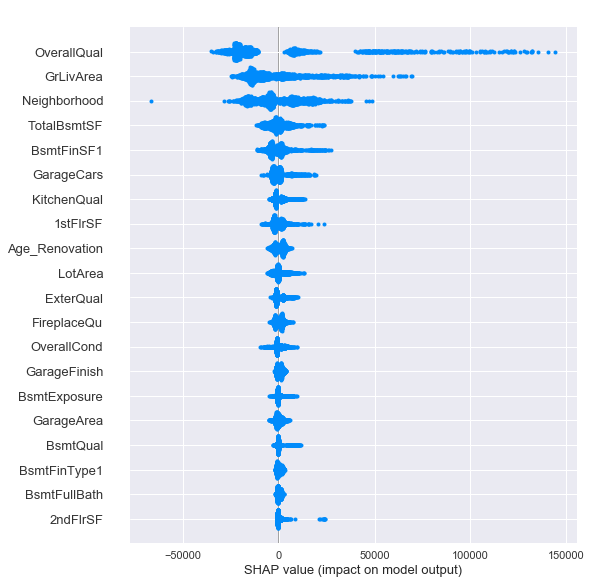

In [91]:
shap.summary_plot(shap_values, X)

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.

The above plot shows the SHAP summary plot. The summary plot combines feature importance with feature effects.

Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.  Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.


- Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Correlation: A high level of the Overall_qual has a high and positive impact on the Overall_qual. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, GrLivArea is positively correlated with the target variable median_house_value.

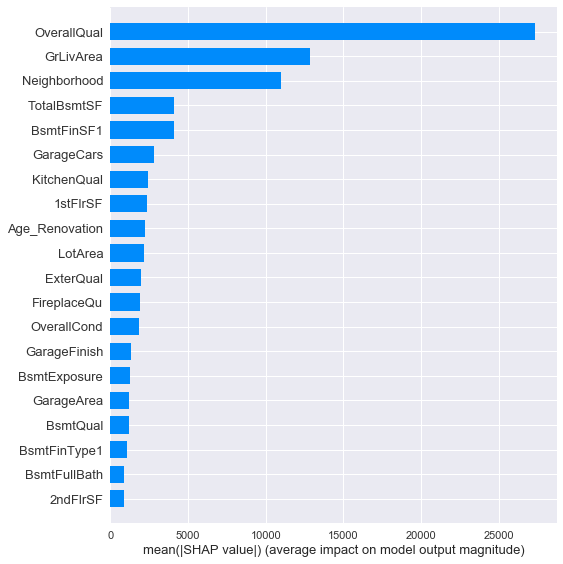

In [92]:
shap.summary_plot(shap_values, X, plot_type="bar")

## PARTIAL DEPENDENCE

In [93]:
Continuous = [key for key in dict(train_data.dtypes) if dict(train_data.dtypes)[key] in ['float64', 'int64']]

In [121]:
#print(best_model.partial_plot(data = X_train_hf, cols = ["MSZoning"], server=True, plot = True))


PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'SalePrice'.


saleprice  mean_response  stddev_response  std_error_mean_response
0     34900.0  181688.630157     76841.244034              2403.637325
1     72800.0  181688.630157     76841.244034              2403.637325
2    110700.0  181688.630157     76841.244034              2403.637325
3    148600.0  181688.630157     76841.244034              2403.637325
4    186500.0  181688.630157     76841.244034              2403.637325
5    224400.0  181688.630157     76841.244034              2403.637325
6    262300.0  181688.630157     76841.244034              2403.637325
7    300200.0  181688.630157     76841.244034              2403.637325
8    338100.0  181688.630157     76841.244034              2403.637325
9    376000.0  181688.630157     76841.244034              2403.637325
10   413900.0  181688.630157     76841.244034              2403.637325
11   451800.0  181688.630157     76841.244034              2403.637325
12   489700.0  181688.630157     76841.244034              2403.637325
13   527600.0  181688.630157     76841.244034              2403.637325
14   565500.0  181688.630157     76841.244034              2403.637325
15   603400.0  181688.630157     76841.244034              2403.637325
16   641300.0  181688.630157     76841.244034              2403.637325
17   679200.0  181688.630157     76841.244034              2403.637325
18   717100.0  181688.630157     76841.244034              2403.637325
19   755000.0  181688.630157     76841.244034              2403.637325

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column '1stFlrSF'.


1stflrsf  mean_response  stddev_response  std_error_mean_response
0    334.000000  177316.567240     74338.394441              2325.346783
1    563.368421  177316.567240     74338.394441              2325.346783
2    792.736842  178510.201308     73600.402170              2302.261969
3   1022.105263  179773.034083     73131.951200              2287.608560
4   1251.473684  181824.727094     72350.787709              2263.173326
5   1480.842105  183626.002040     73439.086811              2297.215934
6   1710.210526  185924.658933     75493.601852              2361.482320
7   1939.578947  186618.386760     78088.339069              2442.647159
8   2168.947368  188364.855740     78651.706661              2460.269614
9   2398.315789  187527.326275     78639.708144              2459.894294
10  2627.684211  187527.326275     78639.708144              2459.894294
11  2857.052632  187527.326275     78639.708144              2459.894294
12  3086.421053  187527.326275     78639.708144              2459.894294
13  3315.789474  187527.326275     78639.708144              2459.894294
14  3545.157895  187527.326275     78639.708144              2459.894294
15  3774.526316  187527.326275     78639.708144              2459.894294
16  4003.894737  187527.326275     78639.708144              2459.894294
17  4233.263158  187527.326275     78639.708144              2459.894294
18  4462.631579  187527.326275     78639.708144              2459.894294
19  4692.000000  187527.326275     78639.708144              2459.894294

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column '2ndFlrSF'.


2ndflrsf  mean_response  stddev_response  std_error_mean_response
0      0.000000  180354.435684     75156.967675              2350.952214
1    108.684211  180354.435684     75156.967675              2350.952214
2    217.368421  180354.435684     75156.967675              2350.952214
3    326.052632  180354.435684     75156.967675              2350.952214
4    434.736842  180403.722532     75188.531388              2351.939544
5    543.421053  180466.780746     75171.671300              2351.412151
6    652.105263  180838.246278     74957.442014              2344.710939
7    760.789474  181756.913720     74579.656409              2332.893593
8    869.473684  182375.292042     74551.755639              2332.020841
9    978.157895  183334.497785     74749.346795              2338.201603
10  1086.842105  184192.677880     74781.199434              2339.197972
11  1195.526316  185055.892099     74752.629780              2338.304297
12  1304.210526  189583.889629     74763.385910              2338.640755
13  1412.894737  220845.221874     73085.718023              2286.162360
14  1521.578947  220845.221874     73085.718023              2286.162360
15  1630.263158  220845.221874     73085.718023              2286.162360
16  1738.947368  220845.221874     73085.718023              2286.162360
17  1847.631579  220845.221874     73085.718023              2286.162360
18  1956.315789  220845.221874     73085.718023              2286.162360
19  2065.000000  220845.221874     73085.718023              2286.162360

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column '3SsnPorch'.


3ssnporch  mean_response  stddev_response  std_error_mean_response
0     0.000000  181685.093919     76839.767417              2403.591136
1    26.736842  181685.093919     76839.767417              2403.591136
2    53.473684  181888.208308     76821.855904              2403.030854
3    80.210526  181888.208308     76821.855904              2403.030854
4   106.947368  181888.208308     76821.855904              2403.030854
5   133.684211  181888.208308     76821.855904              2403.030854
6   160.421053  181888.208308     76821.855904              2403.030854
7   187.157895  181888.208308     76821.855904              2403.030854
8   213.894737  181888.208308     76821.855904              2403.030854
9   240.631579  181888.208308     76821.855904              2403.030854
10  267.368421  181888.208308     76821.855904              2403.030854
11  294.105263  181888.208308     76821.855904              2403.030854
12  320.842105  181888.208308     76821.855904              2403.030854
13  347.578947  181888.208308     76821.855904              2403.030854
14  374.315789  181888.208308     76821.855904              2403.030854
15  401.052632  181888.208308     76821.855904              2403.030854
16  427.789474  181888.208308     76821.855904              2403.030854
17  454.526316  181888.208308     76821.855904              2403.030854
18  481.263158  181888.208308     76821.855904              2403.030854
19  508.000000  181888.208308     76821.855904              2403.030854

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'BedroomAbvGr'.


bedroomabvgr  mean_response  stddev_response  std_error_mean_response
0           0.0  181509.902273     76901.813843              2405.531983
1           1.0  181509.902273     76901.813843              2405.531983
2           2.0  181595.182861     76886.996416              2405.068486
3           3.0  181711.579814     76744.436658              2400.609136
4           4.0  181796.067847     76849.621309              2403.899371
5           5.0  181686.425676     76856.414965              2404.111881
6           6.0  181686.425676     76856.414965              2404.111881
7           7.0  181686.425676     76856.414965              2404.111881
8           8.0  181686.425676     76856.414965              2404.111881

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'BsmtFinSF1'.


bsmtfinsf1  mean_response  stddev_response  std_error_mean_response
0      0.000000  177772.882863     73546.217228              2300.567034
1    297.052632  180171.481695     73036.029231              2284.608066
2    594.105263  181284.486493     72457.208339              2266.502223
3    891.157895  183007.778916     73295.852581              2292.735487
4   1188.210526  186547.141765     75310.877264              2355.766592
5   1485.263158  198144.724949     81017.600004              2534.276089
6   1782.315789  197765.581818     80987.774789              2533.343139
7   2079.368421  197765.581818     80987.774789              2533.343139
8   2376.421053  197765.581818     80987.774789              2533.343139
9   2673.473684  197765.581818     80987.774789              2533.343139
10  2970.526316  197765.581818     80987.774789              2533.343139
11  3267.578947  197765.581818     80987.774789              2533.343139
12  3564.631579  197765.581818     80987.774789              2533.343139
13  3861.684211  197765.581818     80987.774789              2533.343139
14  4158.736842  197765.581818     80987.774789              2533.343139
15  4455.789474  197765.581818     80987.774789              2533.343139
16  4752.842105  197765.581818     80987.774789              2533.343139
17  5049.894737  197765.581818     80987.774789              2533.343139
18  5346.947368  197765.581818     80987.774789              2533.343139
19  5644.000000  197765.581818     80987.774789              2533.343139

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'BsmtFinSF2'.


bsmtfinsf2  mean_response  stddev_response  std_error_mean_response
0      0.000000  181625.064182     76823.188130              2403.072527
1     59.315789  181625.064182     76823.188130              2403.072527
2    118.631579  181625.064182     76823.188130              2403.072527
3    177.947368  181663.354245     76810.208088              2402.666504
4    237.263158  181663.354245     76810.208088              2402.666504
5    296.578947  181663.354245     76810.208088              2402.666504
6    355.894737  181663.354245     76810.208088              2402.666504
7    415.210526  181663.354245     76810.208088              2402.666504
8    474.526316  181769.214301     76788.377975              2401.983645
9    533.842105  181931.411091     76750.583602              2400.801416
10   593.157895  181931.411091     76750.583602              2400.801416
11   652.473684  182042.525640     76726.536259              2400.049202
12   711.789474  182465.021325     76604.848338              2396.242735
13   771.105263  182659.809413     76605.946073              2396.277073
14   830.421053  185238.641303     76522.273889              2393.659760
15   889.736842  185238.641303     76522.273889              2393.659760
16   949.052632  185238.641303     76522.273889              2393.659760
17  1008.368421  185238.641303     76522.273889              2393.659760
18  1067.684211  185238.641303     76522.273889              2393.659760
19  1127.000000  185238.641303     76522.273889              2393.659760

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'BsmtFullBath'.


bsmtfullbath  mean_response  stddev_response  std_error_mean_response
0           0.0  181094.219232     76613.627138              2396.517341
1           1.0  182448.004907     76759.354833              2401.075785
2           2.0  182448.004907     76759.354833              2401.075785
3           3.0  182448.004907     76759.354833              2401.075785

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'BsmtHalfBath'.


bsmthalfbath  mean_response  stddev_response  std_error_mean_response
0           0.0  181688.630157     76841.244034              2403.637325
1           1.0  181688.630157     76841.244034              2403.637325
2           2.0  181688.630157     76841.244034              2403.637325

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'BsmtUnfSF'.


bsmtunfsf  mean_response  stddev_response  std_error_mean_response
0      0.000000  182015.112548     77057.373223              2410.397968
1    122.947368  182015.112548     77057.373223              2410.397968
2    245.894737  181946.703997     77003.837616              2408.723344
3    368.842105  181795.001832     76890.032090              2405.163443
4    491.789474  181727.242999     76885.091708              2405.008905
5    614.736842  181607.485248     76899.379032              2405.455821
6    737.684211  181527.057604     76875.174402              2404.698686
7    860.631579  181510.513300     76855.773772              2404.091824
8    983.578947  181510.513300     76855.773772              2404.091824
9   1106.526316  181510.513300     76855.773772              2404.091824
10  1229.473684  181530.516046     76894.605229              2405.306494
11  1352.421053  181569.260139     76941.464900              2406.772290
12  1475.368421  181502.070488     76922.349918              2406.174363
13  1598.315789  181297.693079     76977.820216              2407.909505
14  1721.263158  181864.538153     76943.630355              2406.840027
15  1844.210526  179309.095423     76785.929414              2401.907053
16  1967.157895  179309.095423     76785.929414              2401.907053
17  2090.105263  179309.095423     76785.929414              2401.907053
18  2213.052632  179309.095423     76785.929414              2401.907053
19  2336.000000  179309.095423     76785.929414              2401.907053

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'EnclosedPorch'.


enclosedporch  mean_response  stddev_response  std_error_mean_response
0        0.000000  181693.280126     76844.817475              2403.749105
1       20.315789  181693.280126     76844.817475              2403.749105
2       40.631579  181693.280126     76844.817475              2403.749105
3       60.947368  181645.311732     76828.770786              2403.247155
4       81.263158  181645.311732     76828.770786              2403.247155
5      101.578947  181645.311732     76828.770786              2403.247155
6      121.894737  181645.311732     76828.770786              2403.247155
7      142.210526  181614.959982     76827.400099              2403.204279
8      162.526316  181648.159143     76813.821459              2402.779532
9      182.842105  181648.159143     76813.821459              2402.779532
10     203.157895  181648.159143     76813.821459              2402.779532
11     223.473684  181648.159143     76813.821459              2402.779532
12     243.789474  181648.159143     76813.821459              2402.779532
13     264.105263  181648.159143     76813.821459              2402.779532
14     284.421053  181648.159143     76813.821459              2402.779532
15     304.736842  181648.159143     76813.821459              2402.779532
16     325.052632  181648.159143     76813.821459              2402.779532
17     345.368421  181648.159143     76813.821459              2402.779532
18     365.684211  181648.159143     76813.821459              2402.779532
19     386.000000  181648.159143     76813.821459              2402.779532

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'Fireplaces'.


fireplaces  mean_response  stddev_response  std_error_mean_response
0         0.0  180986.798879     76476.673655              2392.233359
1         1.0  181996.410177     76036.342202              2378.459543
2         2.0  183664.980892     77286.529180              2417.566095
3         3.0  183664.980892     77286.529180              2417.566095

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'FullBath'.


fullbath  mean_response  stddev_response  std_error_mean_response
0       0.0  181207.753710     76283.487166              2386.190377
1       1.0  181207.753710     76283.487166              2386.190377
2       2.0  181716.942162     76215.240779              2384.055592
3       3.0  185917.033837     78128.686981              2443.909265

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'GarageArea'.


garagearea  mean_response  stddev_response  std_error_mean_response
0      0.000000  179705.253514     76184.889078              2383.106173
1     74.631579  179705.253514     76184.889078              2383.106173
2    149.263158  179705.253514     76184.889078              2383.106173
3    223.894737  179959.320204     76007.086643              2377.544413
4    298.526316  180278.168737     75796.324311              2370.951649
5    373.157895  180747.009331     75668.052045              2366.939220
6    447.789474  181675.077429     75326.707855              2356.261782
7    522.421053  181874.941078     75314.263972              2355.872530
8    597.052632  182600.776318     75628.903154              2365.714621
9    671.684211  183203.022182     75976.790575              2376.596735
10   746.315789  183524.488700     76171.225874              2382.678781
11   820.947368  184148.527704     76724.677626              2399.991063
12   895.578947  183239.015225     76162.498558              2382.405785
13   970.210526  182403.242118     76119.614583              2381.064350
14  1044.842105  182403.242118     76119.614583              2381.064350
15  1119.473684  182403.242118     76119.614583              2381.064350
16  1194.105263  182403.242118     76119.614583              2381.064350
17  1268.736842  182403.242118     76119.614583              2381.064350
18  1343.368421  182403.242118     76119.614583              2381.064350
19  1418.000000  182403.242118     76119.614583              2381.064350

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'GarageCars'.


garagecars  mean_response  stddev_response  std_error_mean_response
0         0.0  178391.409721     72399.338727              2264.692029
1         1.0  178405.655812     72385.857319              2264.270323
2         2.0  180679.527138     71910.833810              2249.411321
3         3.0  187425.949007     75652.654952              2366.457591
4         4.0  187425.949007     75652.654952              2366.457591

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'GrLivArea'.


grlivarea  mean_response  stddev_response  std_error_mean_response
0    334.000000  162144.299682     62382.306218              1951.353619
1    613.368421  162144.299682     62382.306218              1951.353619
2    892.736842  163185.586210     61836.482425              1934.279944
3   1172.105263  167793.294690     60796.179622              1901.738688
4   1451.473684  174669.701767     58580.929375              1832.444414
5   1730.842105  184511.938928     61669.965757              1929.071209
6   2010.210526  195681.955445     65194.519575              2039.321235
7   2289.578947  201505.810645     68244.666839              2134.731556
8   2568.947368  208783.215852     75906.829392              2374.408310
9   2848.315789  229403.955691     82835.034427              2591.126460
10  3127.684211  228514.528598     82801.466907              2590.076449
11  3407.052632  228514.528598     82801.466907              2590.076449
12  3686.421053  228514.528598     82801.466907              2590.076449
13  3965.789474  228514.528598     82801.466907              2590.076449
14  4245.157895  228514.528598     82801.466907              2590.076449
15  4524.526316  228514.528598     82801.466907              2590.076449
16  4803.894737  228514.528598     82801.466907              2590.076449
17  5083.263158  228514.528598     82801.466907              2590.076449
18  5362.631579  228514.528598     82801.466907              2590.076449
19  5642.000000  228514.528598     82801.466907              2590.076449

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'HalfBath'.


halfbath  mean_response  stddev_response  std_error_mean_response
0       0.0  181323.107259     76577.182334              2395.377327
1       1.0  182288.255347     76731.062801              2400.190794
2       2.0  182288.255347     76731.062801              2400.190794

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'KitchenAbvGr'.


kitchenabvgr  mean_response  stddev_response  std_error_mean_response
0           1.0  181711.154407     76829.598414              2403.273044
1           2.0  181391.126227     76730.406835              2400.170275
2           3.0  181391.126227     76730.406835              2400.170275

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'LotArea'.


lotarea  mean_response  stddev_response  std_error_mean_response
0     1300.000000  178987.580186     75884.597233              2373.712875
1    12560.263158  183508.278698     75867.130142              2373.166495
2    23820.526316  187481.619277     76996.354819              2408.489278
3    35080.789474  188562.305428     76861.749285              2404.278741
4    46341.052632  183596.138479     76443.459144              2391.194390
5    57601.315789  183596.138479     76443.459144              2391.194390
6    68861.578947  183596.138479     76443.459144              2391.194390
7    80121.842105  183596.138479     76443.459144              2391.194390
8    91382.105263  183596.138479     76443.459144              2391.194390
9   102642.368421  183596.138479     76443.459144              2391.194390
10  113902.631579  183596.138479     76443.459144              2391.194390
11  125162.894737  183596.138479     76443.459144              2391.194390
12  136423.157895  183596.138479     76443.459144              2391.194390
13  147683.421053  183596.138479     76443.459144              2391.194390
14  158943.684211  183596.138479     76443.459144              2391.194390
15  170203.947368  183596.138479     76443.459144              2391.194390
16  181464.210526  183596.138479     76443.459144              2391.194390
17  192724.473684  183596.138479     76443.459144              2391.194390
18  203984.736842  183596.138479     76443.459144              2391.194390
19  215245.000000  183596.138479     76443.459144              2391.194390

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'LotFrontage'.


lotfrontage  mean_response  stddev_response  std_error_mean_response
0     21.000000  181011.177523     75966.369394              2376.270755
1     36.368421  181011.177523     75966.369394              2376.270755
2     51.736842  181050.448571     75950.885535              2375.786411
3     67.105263  181173.179683     75991.550218              2377.058425
4     82.473684  181798.339372     76211.011611              2383.923301
5     97.842105  181788.749289     76224.517327              2384.345767
6    113.210526  183375.081129     77743.677458              2431.865950
7    128.578947  184360.751863     77766.906603              2432.592571
8    143.947368  186327.589561     77751.998646              2432.126242
9    159.315789  186327.589561     77751.998646              2432.126242
10   174.684211  186327.589561     77751.998646              2432.126242
11   190.052632  186327.589561     77751.998646              2432.126242
12   205.421053  186327.589561     77751.998646              2432.126242
13   220.789474  186327.589561     77751.998646              2432.126242
14   236.157895  186327.589561     77751.998646              2432.126242
15   251.526316  186327.589561     77751.998646              2432.126242
16   266.894737  186327.589561     77751.998646              2432.126242
17   282.263158  186327.589561     77751.998646              2432.126242
18   297.631579  186327.589561     77751.998646              2432.126242
19   313.000000  186327.589561     77751.998646              2432.126242

[]


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'LowQualFinSF'.


lowqualfinsf  mean_response  stddev_response  std_error_mean_response
0       0.000000  181688.630157     76841.244034              2403.637325
1      30.105263  181688.630157     76841.244034              2403.637325
2      60.210526  181688.630157     76841.244034              2403.637325
3      90.315789  181688.630157     76841.244034              2403.637325
4     120.421053  181688.630157     76841.244034              2403.637325
5     150.526316  181688.630157     76841.244034              2403.637325
6     180.631579  181688.630157     76841.244034              2403.637325
7     210.736842  181688.630157     76841.244034              2403.637325
8     240.842105  181688.630157     76841.244034              2403.637325
9     270.947368  181688.630157     76841.244034              2403.637325
10    301.052632  181688.630157     76841.244034              2403.637325
11    331.157895  181688.630157     76841.244034              2403.637325
12    361.263158  181688.630157     76841.244034              2403.637325
13    391.368421  181688.630157     76841.244034              2403.637325
14    421.473684  181688.630157     76841.244034              2403.637325
15    451.578947  181688.630157     76841.244034              2403.637325
16    481.684211  181688.630157     76841.244034              2403.637325
17    511.789474  181688.630157     76841.244034              2403.637325
18    541.894737  181688.630157     76841.244034              2403.637325
19    572.000000  181688.630157     76841.244034              2403.637325

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'MSSubClass'.


mssubclass  mean_response  stddev_response  std_error_mean_response
0    20.000000  181700.189935     76771.328410              2401.450325
1    28.947368  181700.189935     76771.328410              2401.450325
2    37.894737  181723.508243     76792.569774              2402.114767
3    46.842105  181800.940533     76957.224297              2407.265253
4    55.789474  181797.441420     76953.544934              2407.150161
5    64.736842  181768.941626     76942.281636              2406.797838
6    73.684211  181768.941626     76942.281636              2406.797838
7    82.631579  181702.299889     76889.482577              2405.146254
8    91.578947  181643.092083     76892.970478              2405.255358
9   100.526316  181643.092083     76892.970478              2405.255358
10  109.473684  181643.092083     76892.970478              2405.255358
11  118.421053  181643.092083     76892.970478              2405.255358
12  127.368421  181643.092083     76892.970478              2405.255358
13  136.315789  181643.092083     76892.970478              2405.255358
14  145.263158  181567.489741     76895.564316              2405.336494
15  154.210526  181567.489741     76895.564316              2405.336494
16  163.157895  181567.489741     76895.564316              2405.336494
17  172.105263  181567.489741     76895.564316              2405.336494
18  181.052632  181567.489741     76895.564316              2405.336494
19  190.000000  181567.489741     76895.564316              2405.336494

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'MasVnrArea'.


masvnrarea  mean_response  stddev_response  std_error_mean_response
0      0.000000  181374.355921     76195.969881              2383.452787
1     72.526316  181390.936673     76213.842459              2384.011851
2    145.052632  181412.351007     76235.114300              2384.677246
3    217.578947  181476.081057     76457.024650              2391.618727
4    290.105263  181568.392043     76565.236992              2395.003670
5    362.631579  182157.048294     77241.990008              2416.172885
6    435.157895  182167.098445     77428.426199              2422.004714
7    507.684211  182167.098445     77428.426199              2422.004714
8    580.210526  181879.242822     77406.434943              2421.316815
9    652.736842  181641.244947     77434.722242              2422.201657
10   725.263158  182032.426692     77412.751223              2421.514392
11   797.789474  181848.396014     77307.561324              2418.223992
12   870.315789  181848.396014     77307.561324              2418.223992
13   942.842105  181848.396014     77307.561324              2418.223992
14  1015.368421  181848.396014     77307.561324              2418.223992
15  1087.894737  181848.396014     77307.561324              2418.223992
16  1160.421053  181848.396014     77307.561324              2418.223992
17  1232.947368  181848.396014     77307.561324              2418.223992
18  1305.473684  181848.396014     77307.561324              2418.223992
19  1378.000000  181848.396014     77307.561324              2418.223992

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'MiscVal'.


miscval  mean_response  stddev_response  std_error_mean_response
0      0.000000  181688.630157     76841.244034              2403.637325
1    184.210526  181688.630157     76841.244034              2403.637325
2    368.421053  181688.630157     76841.244034              2403.637325
3    552.631579  181688.630157     76841.244034              2403.637325
4    736.842105  181688.630157     76841.244034              2403.637325
5    921.052632  181688.630157     76841.244034              2403.637325
6   1105.263158  181688.630157     76841.244034              2403.637325
7   1289.473684  181688.630157     76841.244034              2403.637325
8   1473.684211  181688.630157     76841.244034              2403.637325
9   1657.894737  181688.630157     76841.244034              2403.637325
10  1842.105263  181688.630157     76841.244034              2403.637325
11  2026.315789  181688.630157     76841.244034              2403.637325
12  2210.526316  181688.630157     76841.244034              2403.637325
13  2394.736842  181688.630157     76841.244034              2403.637325
14  2578.947368  181688.630157     76841.244034              2403.637325
15  2763.157895  181688.630157     76841.244034              2403.637325
16  2947.368421  181688.630157     76841.244034              2403.637325
17  3131.578947  181688.630157     76841.244034              2403.637325
18  3315.789474  181688.630157     76841.244034              2403.637325
19  3500.000000  181688.630157     76841.244034              2403.637325

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'MoSold'.


mosold  mean_response  stddev_response  std_error_mean_response
0      1.0  180975.198725     76772.156186              2401.476219
1      2.0  180975.198725     76772.156186              2401.476219
2      3.0  181634.227264     76817.784576              2402.903500
3      4.0  181866.775674     77004.158500              2408.733382
4      5.0  181851.435604     76872.825821              2404.625221
5      6.0  181821.061121     76839.480195              2403.582152
6      7.0  181811.489213     76800.257608              2402.355247
7      8.0  181741.842339     76726.717497              2400.054871
8      9.0  181581.227311     76690.690499              2398.927926
9     10.0  181558.159118     76708.859359              2399.496258
10    11.0  181545.246287     76697.085849              2399.127976
11    12.0  181545.246287     76697.085849              2399.127976

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'OpenPorchSF'.


openporchsf  mean_response  stddev_response  std_error_mean_response
0      0.000000  180870.277540     76077.979313              2379.761976
1     27.526316  181008.862161     76065.186159              2379.361799
2     55.052632  182286.422228     76694.523028              2399.047810
3     82.578947  182703.279296     76779.930992              2401.719419
4    110.105263  182890.109157     76773.108013              2401.505992
5    137.631579  184168.133738     76910.181247              2405.793720
6    165.157895  184928.086248     76935.275959              2406.578697
7    192.684211  186245.707266     76775.382620              2401.577143
8    220.210526  187656.572236     76632.992135              2397.123089
9    247.736842  187194.092106     76569.425983              2395.134704
10   275.263158  185935.109013     76532.737745              2393.987075
11   302.789474  164775.864310     74166.812963              2319.979618
12   330.315789  164775.864310     74166.812963              2319.979618
13   357.842105  164775.864310     74166.812963              2319.979618
14   385.368421  164775.864310     74166.812963              2319.979618
15   412.894737  164775.864310     74166.812963              2319.979618
16   440.421053  164775.864310     74166.812963              2319.979618
17   467.947368  164775.864310     74166.812963              2319.979618
18   495.473684  164775.864310     74166.812963              2319.979618
19   523.000000  164775.864310     74166.812963              2319.979618

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'OverallCond'.


overallcond  mean_response  stddev_response  std_error_mean_response
0          2.0  175375.590492     79129.814396              2475.225093
1          3.0  175375.590492     79129.814396              2475.225093
2          4.0  178099.997933     78328.471401              2450.158634
3          5.0  180648.629506     76815.598154              2402.835108
4          6.0  182176.680324     76381.328867              2389.250920
5          7.0  184934.350195     76420.332883              2390.470988
6          8.0  184934.350195     76420.332883              2390.470988
7          9.0  184934.350195     76420.332883              2390.470988

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'OverallQual'.


overallqual  mean_response  stddev_response  std_error_mean_response
0          1.0  162926.680018     54565.198616              1706.830098
1          2.0  162926.680018     54565.198616              1706.830098
2          3.0  162926.680018     54565.198616              1706.830098
3          4.0  163681.425572     54098.652987              1692.236288
4          5.0  165566.467822     53178.383963              1663.449755
5          6.0  172428.715232     54682.196575              1710.489860
6          7.0  187217.932296     57685.442529              1804.433082
7          8.0  211402.385628     58272.737839              1822.804010
8          9.0  228844.474160     63309.457974              1980.355448
9         10.0  235795.049861     62854.965839              1966.138678

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'PoolArea'.


poolarea  mean_response  stddev_response  std_error_mean_response
0     0.000000  181688.630157     76841.244034              2403.637325
1    38.842105  181688.630157     76841.244034              2403.637325
2    77.684211  181688.630157     76841.244034              2403.637325
3   116.526316  181688.630157     76841.244034              2403.637325
4   155.368421  181688.630157     76841.244034              2403.637325
5   194.210526  181688.630157     76841.244034              2403.637325
6   233.052632  181688.630157     76841.244034              2403.637325
7   271.894737  181688.630157     76841.244034              2403.637325
8   310.736842  181688.630157     76841.244034              2403.637325
9   349.578947  181688.630157     76841.244034              2403.637325
10  388.421053  181688.630157     76841.244034              2403.637325
11  427.263158  181688.630157     76841.244034              2403.637325
12  466.105263  181688.630157     76841.244034              2403.637325
13  504.947368  181688.630157     76841.244034              2403.637325
14  543.789474  181688.630157     76841.244034              2403.637325
15  582.631579  181688.630157     76841.244034              2403.637325
16  621.473684  181688.630157     76841.244034              2403.637325
17  660.315789  181688.630157     76841.244034              2403.637325
18  699.157895  181688.630157     76841.244034              2403.637325
19  738.000000  181688.630157     76841.244034              2403.637325

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'ScreenPorch'.


screenporch  mean_response  stddev_response  std_error_mean_response
0      0.000000  181482.218465     76745.767100              2400.650753
1     23.157895  181632.689442     76721.533462              2399.892711
2     46.315789  181689.944539     76686.243615              2398.788825
3     69.473684  181831.884104     76603.868817              2396.212095
4     92.631579  181910.808364     76598.579225              2396.046634
5    115.789474  181978.697431     76565.955098              2395.026133
6    138.947368  182807.319878     76410.322701              2390.157864
7    162.105263  184966.089411     76519.042857              2393.558691
8    185.263158  185437.110784     76502.021857              2393.026265
9    208.421053  185593.648729     76489.815929              2392.644457
10   231.578947  185593.648729     76489.815929              2392.644457
11   254.736842  185593.648729     76489.815929              2392.644457
12   277.894737  185593.648729     76489.815929              2392.644457
13   301.052632  185593.648729     76489.815929              2392.644457
14   324.210526  185593.648729     76489.815929              2392.644457
15   347.368421  185593.648729     76489.815929              2392.644457
16   370.526316  185593.648729     76489.815929              2392.644457
17   393.684211  185593.648729     76489.815929              2392.644457
18   416.842105  185593.648729     76489.815929              2392.644457
19   440.000000  185593.648729     76489.815929              2392.644457

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'TotRmsAbvGrd'.


totrmsabvgrd  mean_response  stddev_response  std_error_mean_response
0            2.0  180798.391882     74709.508465              2336.955438
1            3.0  180798.391882     74709.508465              2336.955438
2            4.0  180798.391882     74709.508465              2336.955438
3            5.0  180798.391882     74709.508465              2336.955438
4            6.0  181112.562551     74649.414644              2335.075669
5            7.0  181125.059932     74659.782619              2335.399986
6            8.0  181185.349917     74718.670879              2337.242043
7            9.0  182032.197641     75438.363446              2359.754432
8           10.0  185356.277750     80806.850779              2527.683734
9           11.0  181701.121286     80571.317721              2520.316128
10          12.0  181701.121286     80571.317721              2520.316128
11          13.0  181701.121286     80571.317721              2520.316128
12          14.0  181701.121286     80571.317721              2520.316128

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'TotalBsmtSF'.


totalbsmtsf  mean_response  stddev_response  std_error_mean_response
0      0.000000  175375.506704     73046.732615              2284.942874
1    321.578947  175375.506704     73046.732615              2284.942874
2    643.157895  176176.588788     72689.014006              2273.753235
3    964.736842  179408.054891     72143.531788              2256.690245
4   1286.315789  183515.604430     71902.825999              2249.160832
5   1607.894737  186105.372544     72922.736327              2281.064201
6   1929.473684  189290.700238     78030.578017              2440.840361
7   2251.052632  197968.705942     79418.275343              2484.248314
8   2572.631579  197968.705942     79418.275343              2484.248314
9   2894.210526  197968.705942     79418.275343              2484.248314
10  3215.789474  197968.705942     79418.275343              2484.248314
11  3537.368421  197968.705942     79418.275343              2484.248314
12  3858.947368  197968.705942     79418.275343              2484.248314
13  4180.526316  197968.705942     79418.275343              2484.248314
14  4502.105263  197968.705942     79418.275343              2484.248314
15  4823.684211  197968.705942     79418.275343              2484.248314
16  5145.263158  197968.705942     79418.275343              2484.248314
17  5466.842105  197968.705942     79418.275343              2484.248314
18  5788.421053  197968.705942     79418.275343              2484.248314
19  6110.000000  197968.705942     79418.275343              2484.248314

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'WoodDeckSF'.


wooddecksf  mean_response  stddev_response  std_error_mean_response
0     0.000000  181013.793967     76448.425112              2391.349729
1    38.315789  181069.789521     76414.282180              2390.281718
2    76.631579  181253.253467     76385.280660              2389.374535
3   114.947368  181279.249786     76400.667803              2389.855853
4   153.263158  181724.698838     76522.653875              2393.671646
5   191.578947  182445.338135     76692.842450              2398.995240
6   229.894737  183023.794170     76623.398044              2396.822980
7   268.210526  183187.711248     76628.405555              2396.979618
8   306.526316  183221.514597     76647.903984              2397.589540
9   344.842105  183421.759630     76937.486778              2406.647853
10  383.157895  183750.952529     76829.565596              2403.272017
11  421.473684  183750.952529     76829.565596              2403.272017
12  459.789474  183750.952529     76829.565596              2403.272017
13  498.105263  183750.952529     76829.565596              2403.272017
14  536.421053  183750.952529     76829.565596              2403.272017
15  574.736842  183750.952529     76829.565596              2403.272017
16  613.052632  183750.952529     76829.565596              2403.272017
17  651.368421  183750.952529     76829.565596              2403.272017
18  689.684211  183750.952529     76829.565596              2403.272017
19  728.000000  183750.952529     76829.565596              2403.272017

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'YrSold'.


yrsold  mean_response  stddev_response  std_error_mean_response
0  2006.0  181732.103066     76892.431578              2405.238501
1  2007.0  181732.103066     76892.431578              2405.238501
2  2008.0  181659.656533     76737.537721              2400.393334
3  2009.0  181639.101249     76769.449356              2401.391548
4  2010.0  181639.101249     76769.449356              2401.391548

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'Age_House'.


age_house  mean_response  stddev_response  std_error_mean_response
0    10.000000  183522.313094     76397.329114              2389.751417
1    17.105263  182216.407459     76339.350377              2387.937810
2    24.210526  181975.765792     76385.489410              2389.381064
3    31.315789  181926.793045     76359.030549              2388.553416
4    38.421053  181665.811700     76472.387699              2392.099292
5    45.526316  181665.811700     76472.387699              2392.099292
6    52.631579  181665.811700     76472.387699              2392.099292
7    59.736842  181603.986410     76510.507559              2393.291702
8    66.842105  181486.553806     76587.925828              2395.713389
9    73.947368  181258.761364     76679.434084              2398.575819
10   81.052632  181082.041641     76798.329470              2402.294934
11   88.157895  180898.505692     76886.146100              2405.041887
12   95.263158  180909.918014     76882.878421              2404.939672
13  102.368421  180909.918014     76882.878421              2404.939672
14  109.473684  180909.918014     76882.878421              2404.939672
15  116.578947  180909.918014     76882.878421              2404.939672
16  123.684211  180909.918014     76882.878421              2404.939672
17  130.789474  180909.918014     76882.878421              2404.939672
18  137.894737  180909.918014     76882.878421              2404.939672
19  145.000000  180909.918014     76882.878421              2404.939672

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'Age_Renovation'.


age_renovation  mean_response  stddev_response  std_error_mean_response
0        10.000000  184165.261305     76330.695996              2387.667096
1        13.157895  183622.940263     76115.992948              2380.951064
2        16.315789  183373.280576     75890.988046              2373.912784
3        19.473684  183171.890584     75756.282818              2369.699128
4        22.631579  183006.539521     75629.616744              2365.736942
5        25.789474  182288.638943     75272.926278              2354.579464
6        28.947368  182170.009801     75205.636083              2352.474589
7        32.105263  182035.022450     75096.010706              2349.045445
8        35.263158  180979.132775     74906.376179              2343.113571
9        38.421053  180748.720502     74845.897141              2341.221753
10       41.578947  180472.575380     74759.734292              2338.526530
11       44.736842  180284.094727     74820.275478              2340.420292
12       47.894737  179618.988803     75142.249754              2350.491829
13       51.052632  179597.595518     75158.922132              2351.013350
14       54.210526  179588.535271     75165.063312              2351.205450
15       57.368421  179556.871993     75179.481804              2351.656468
16       60.526316  179361.472249     75226.202443              2353.117916
17       63.684211  179312.451921     75252.750562              2353.948356
18       66.842105  179073.192638     75417.277601              2359.094855
19       70.000000  178732.877390     75669.800421              2366.993910

[]

PartialDependence: Partial Dependence Plot of model gbm_grid1_model_37 on column 'Garage_age'.


garage_age  mean_response  stddev_response  std_error_mean_response
0    10.000000  183436.484168     76604.189839              2396.222137
1    17.105263  181810.569094     76655.861600              2397.838459
2    24.210526  181762.578198     76655.546432              2397.828600
3    31.315789  181632.072857     76619.834414              2396.711508
4    38.421053  181632.072857     76619.834414              2396.711508
5    45.526316  181576.393476     76615.535044              2396.577021
6    52.631579  181567.665125     76616.488954              2396.606860
7    59.736842  181549.501341     76626.431070              2396.917855
8    66.842105  181526.212063     76647.393222              2397.573563
9    73.947368  181525.969320     76681.141009              2398.629213
10   81.052632  181288.311896     76842.680823              2403.682269
11   88.157895  181274.405785     76856.402405              2404.111488
12   95.263158  181274.405785     76856.402405              2404.111488
13  102.368421  181246.893852     76878.677912              2404.808278
14  109.473684  181246.893852     76878.677912              2404.808278
15  116.578947  181246.893852     76878.677912              2404.808278
16  123.684211  181246.893852     76878.677912              2404.808278
17  130.789474  181246.893852     76878.677912              2404.808278
18  137.894737  181246.893852     76878.677912              2404.808278
19  145.000000  181246.893852     76878.677912              2404.808278

[]


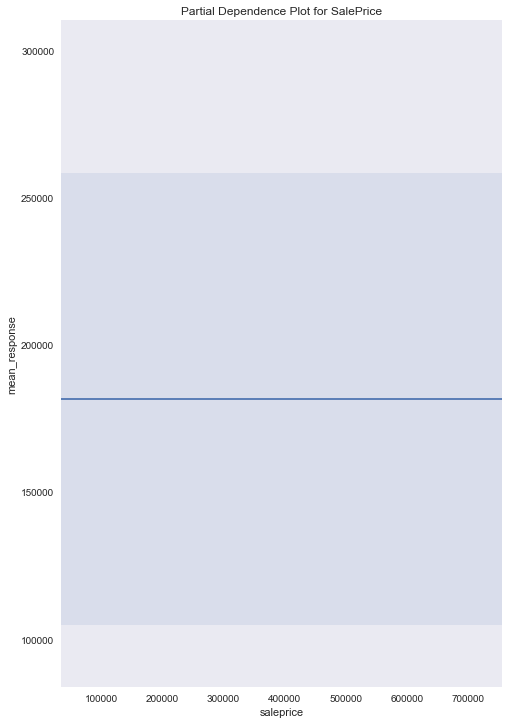

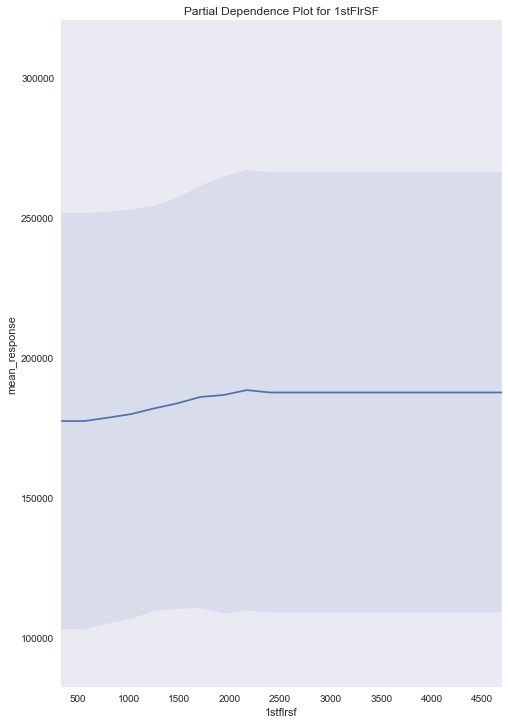

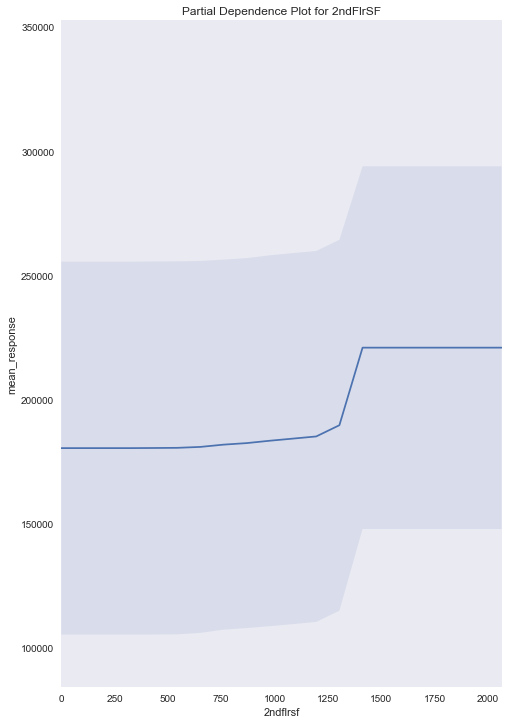

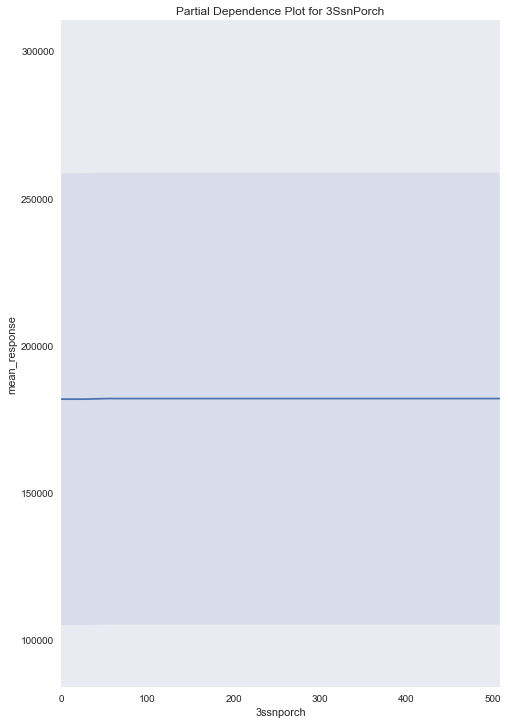

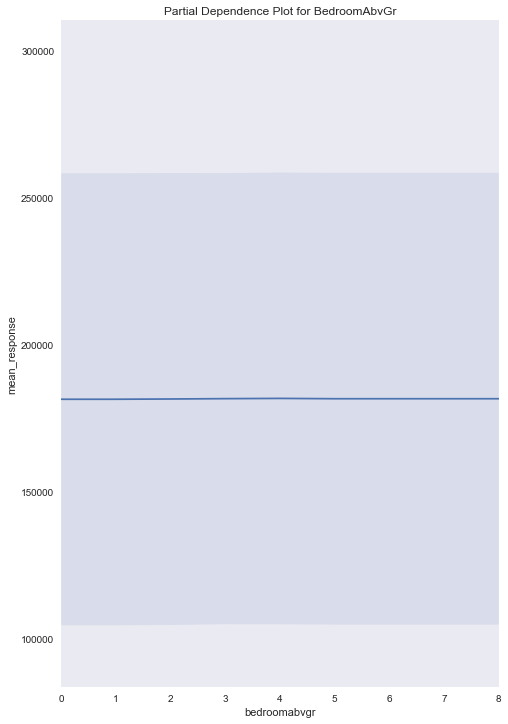

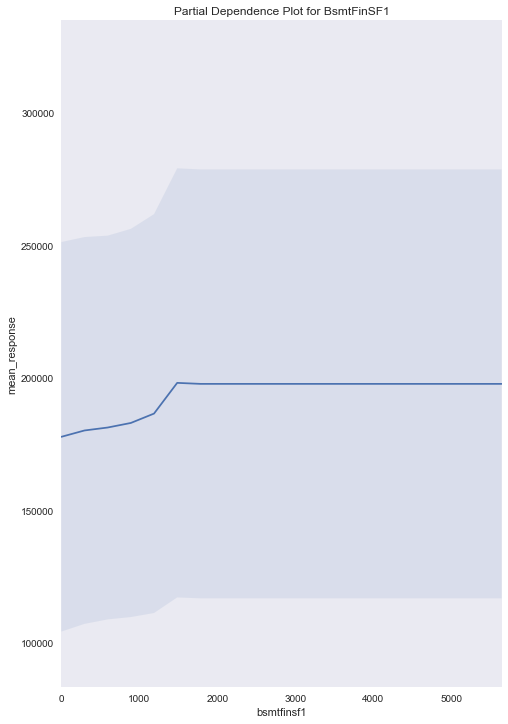

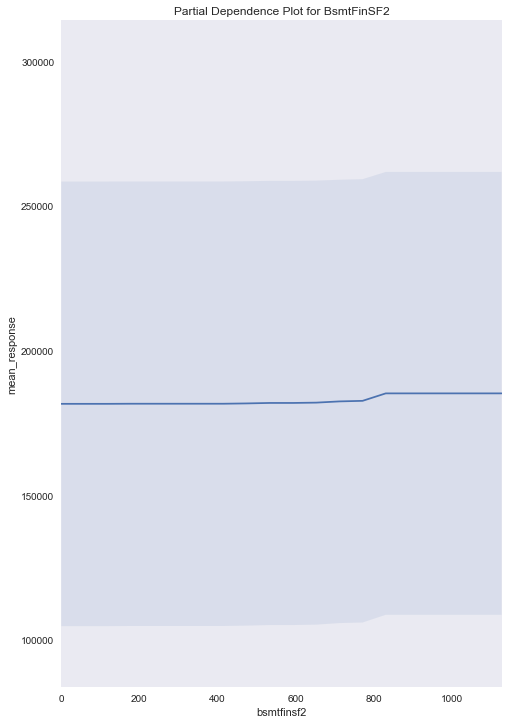

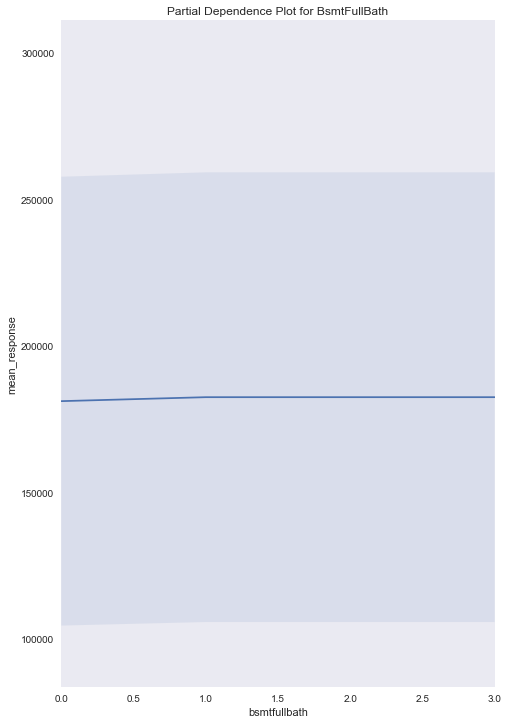

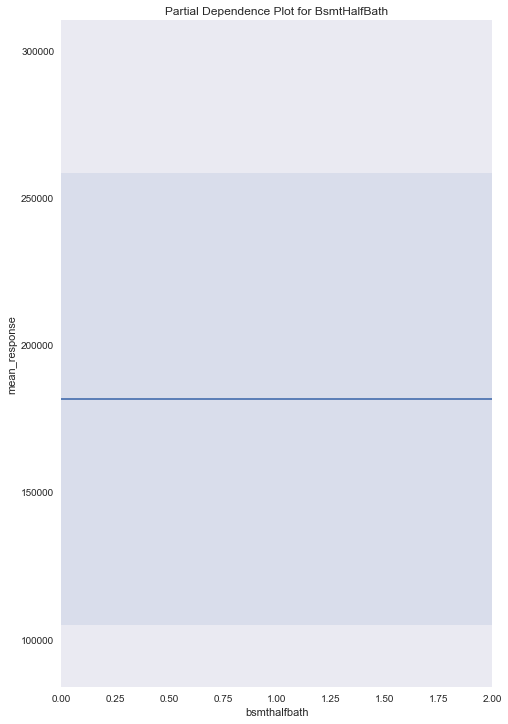

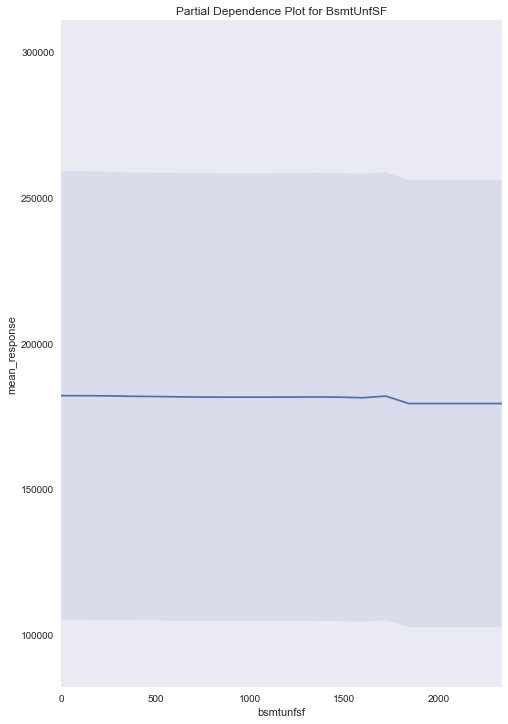

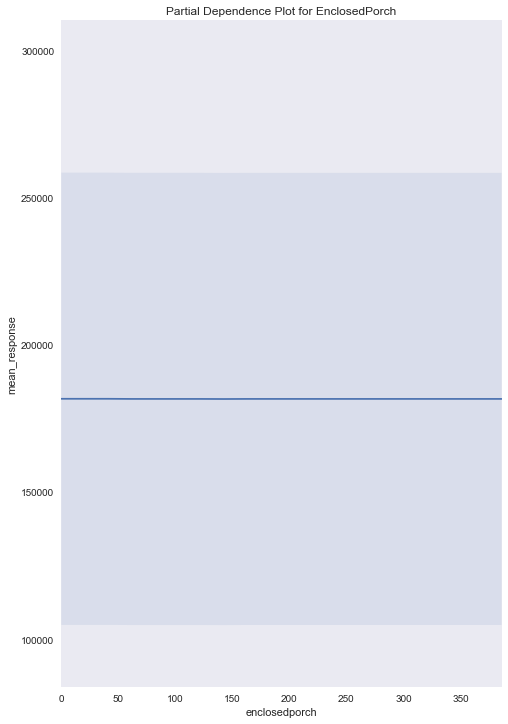

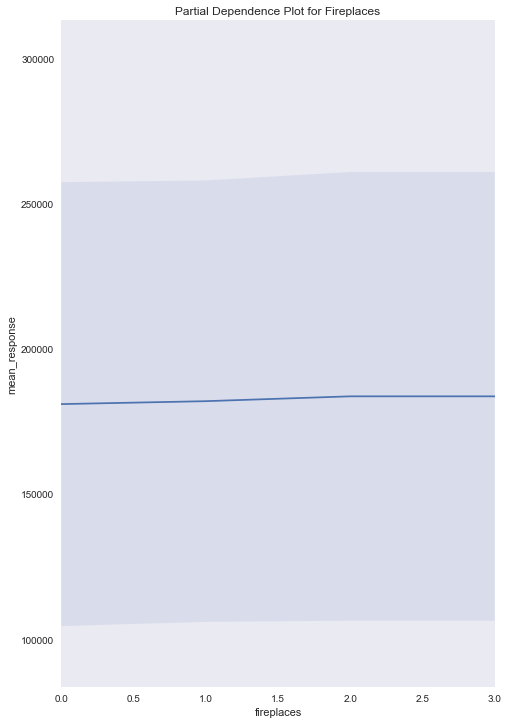

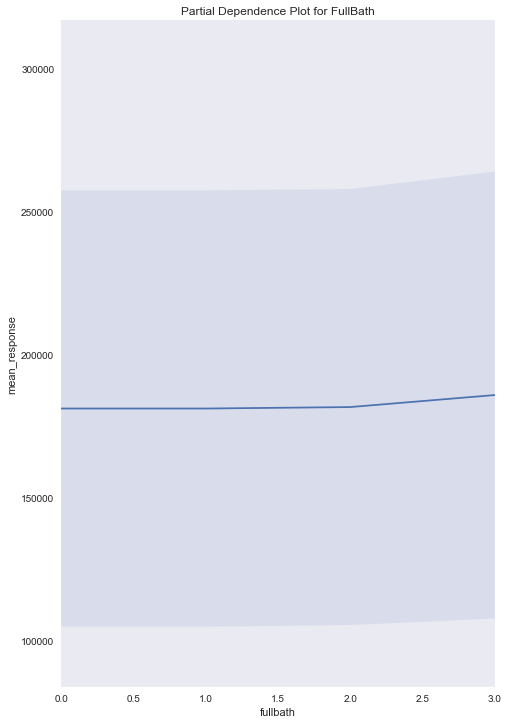

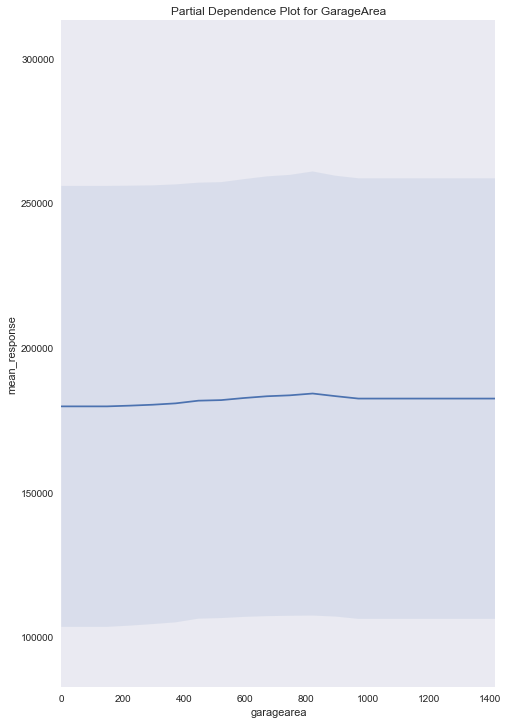

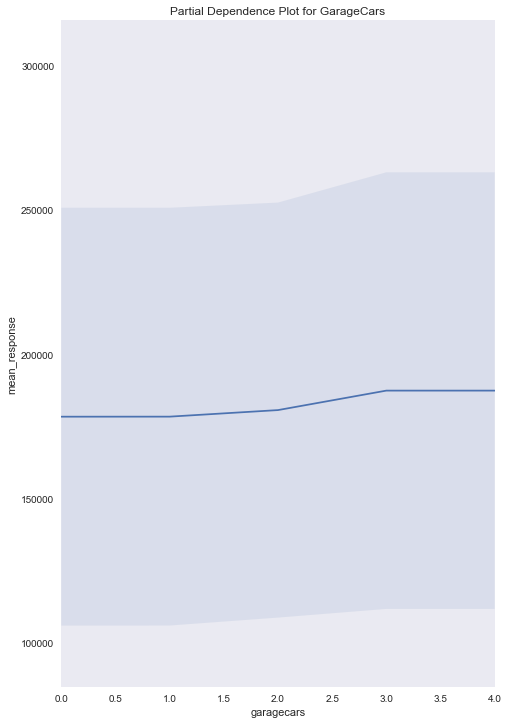

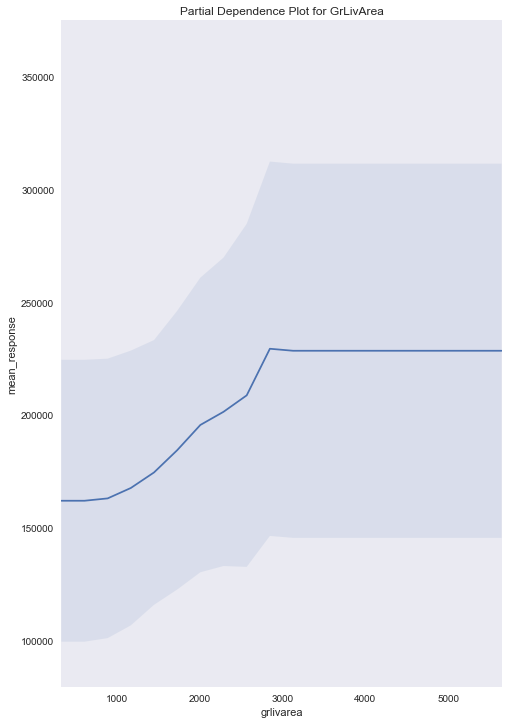

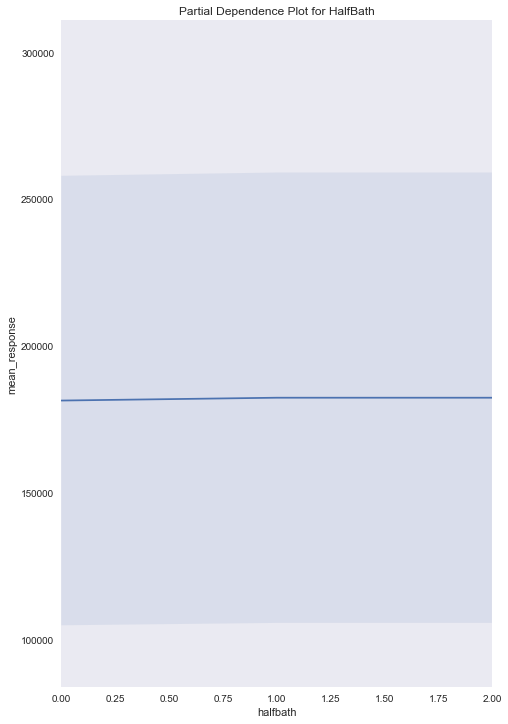

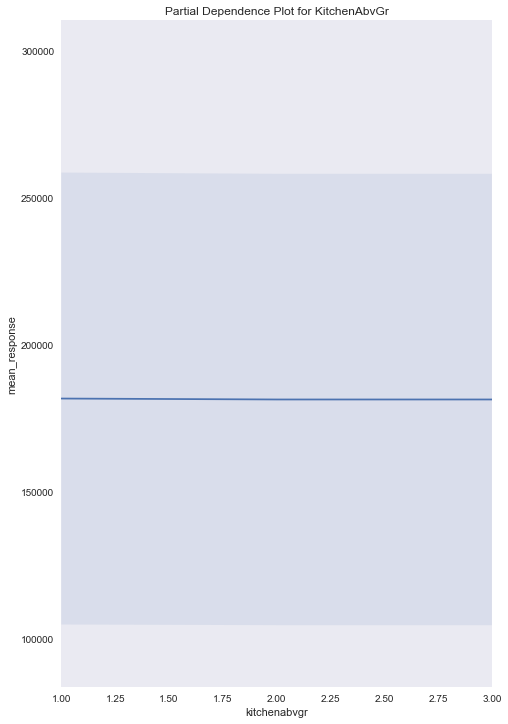

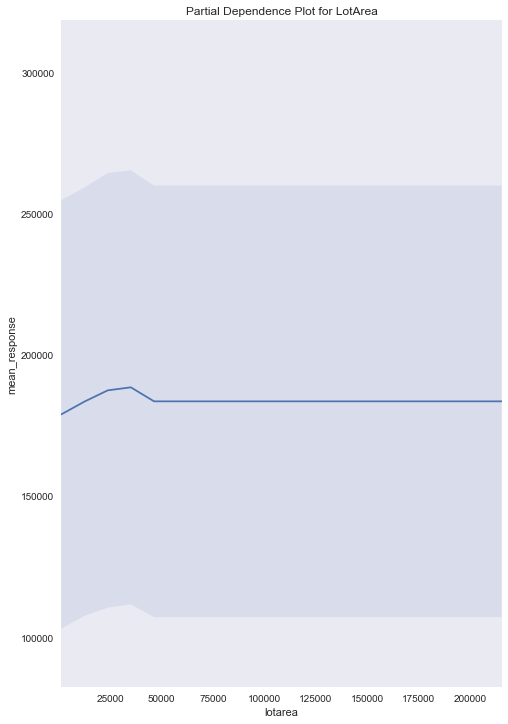

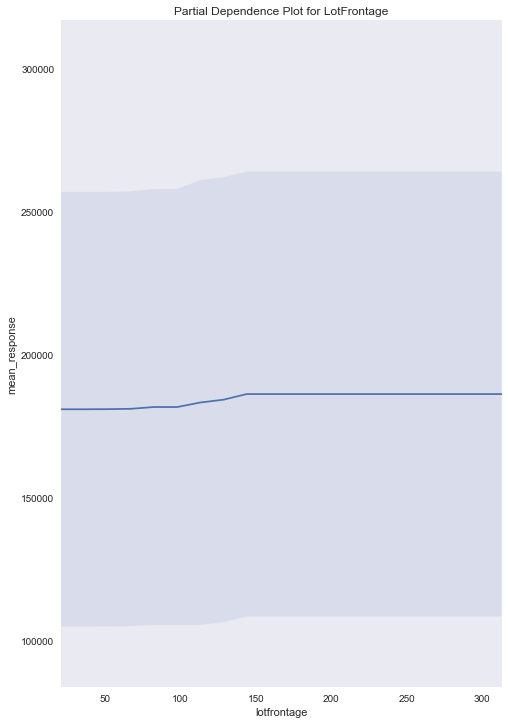

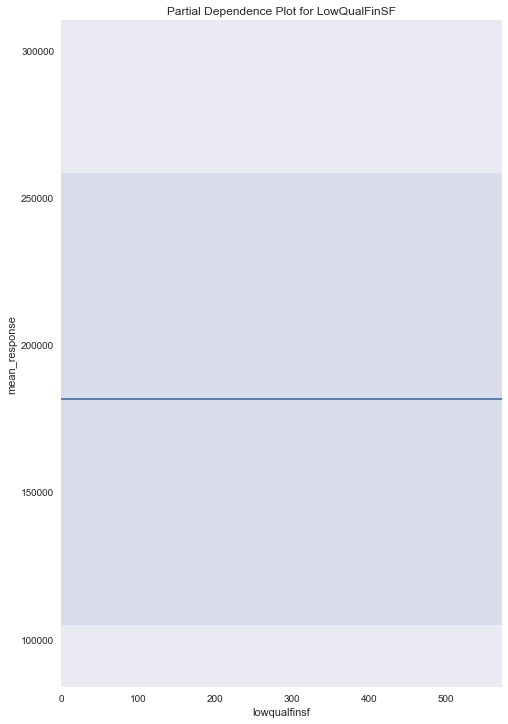

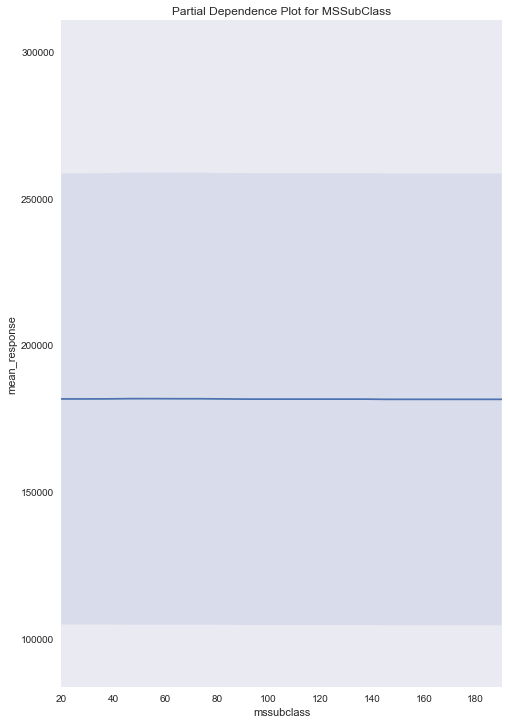

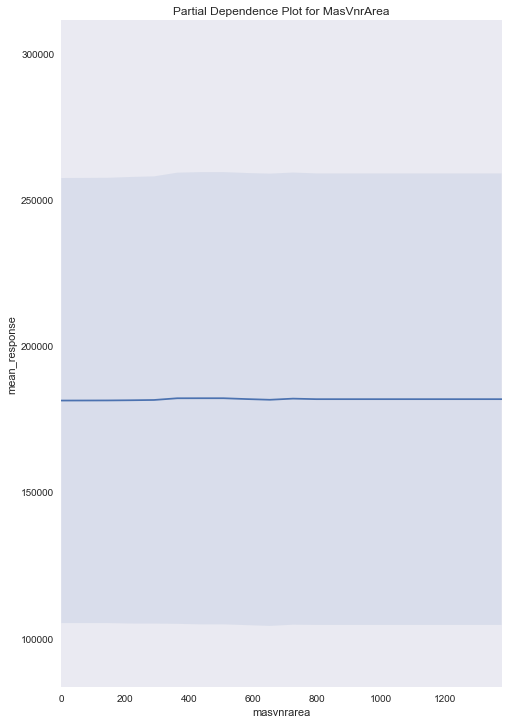

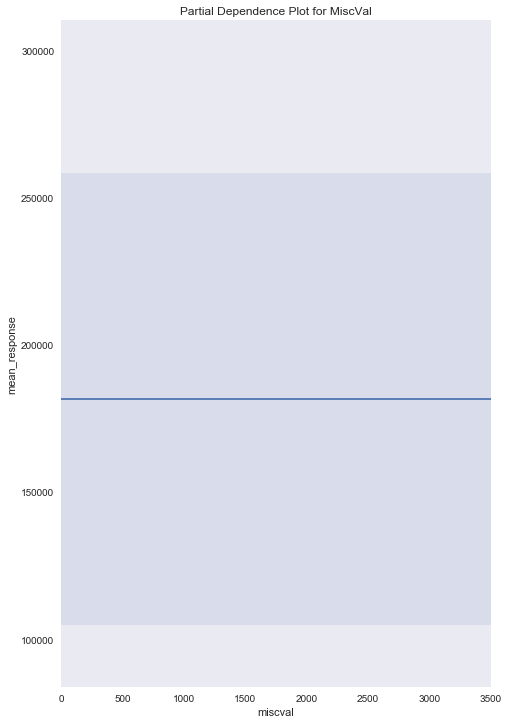

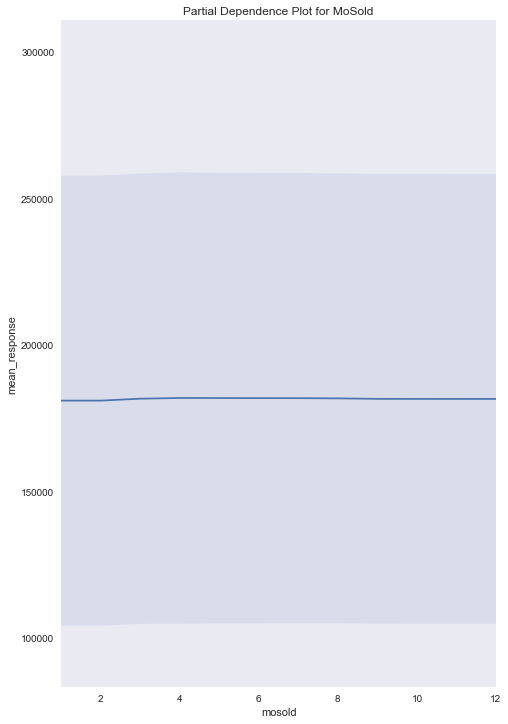

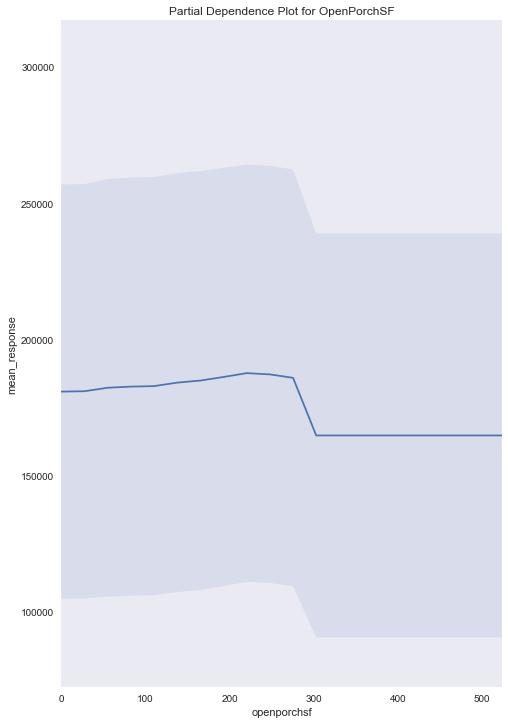

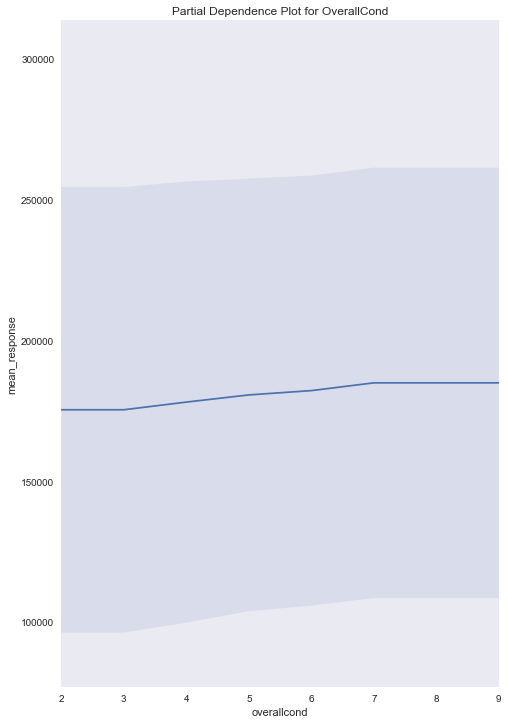

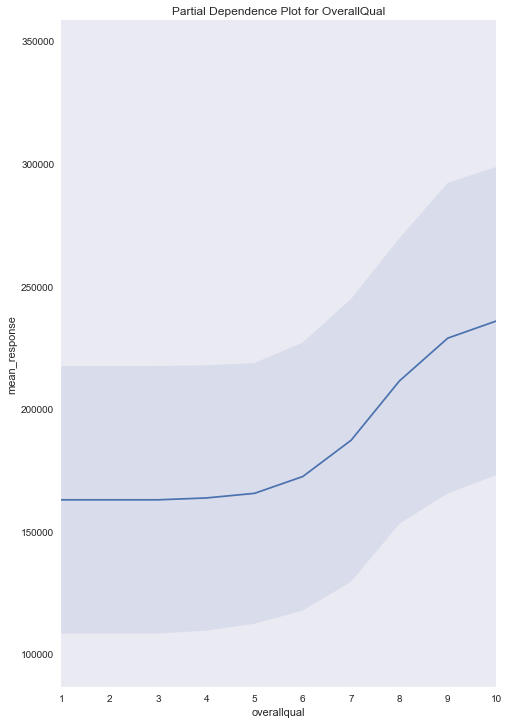

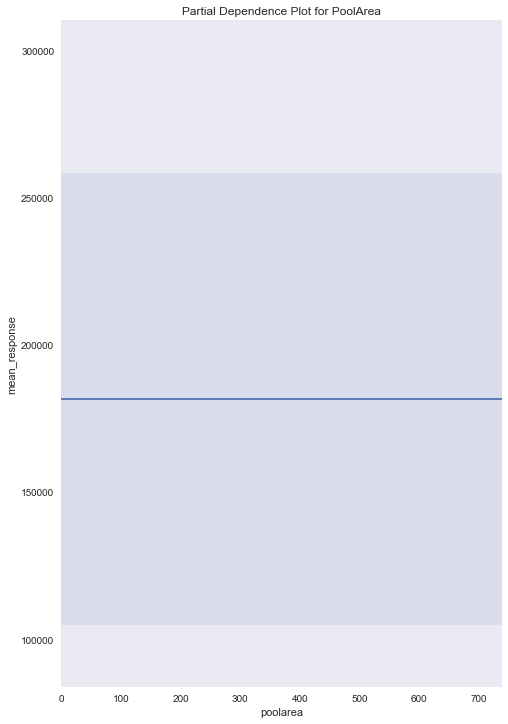

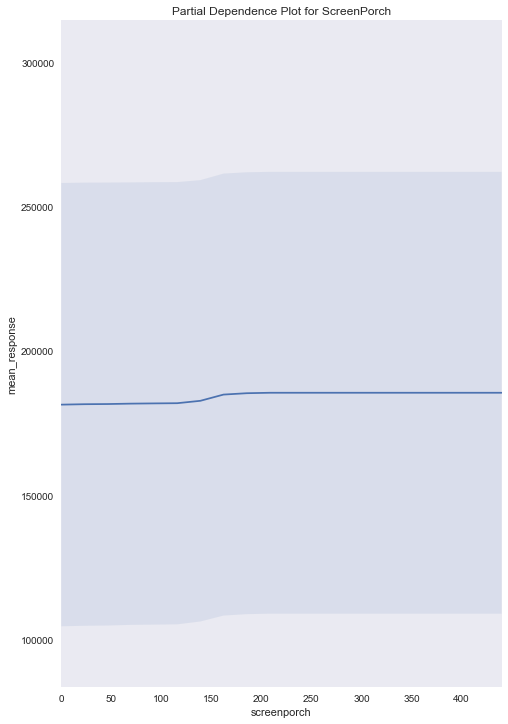

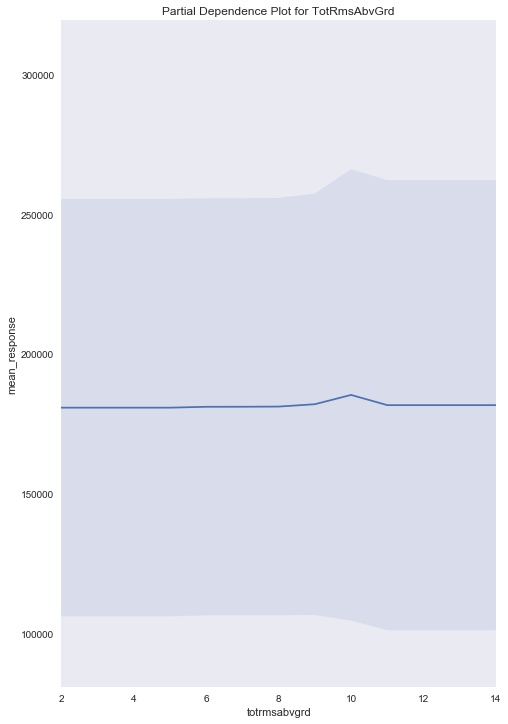

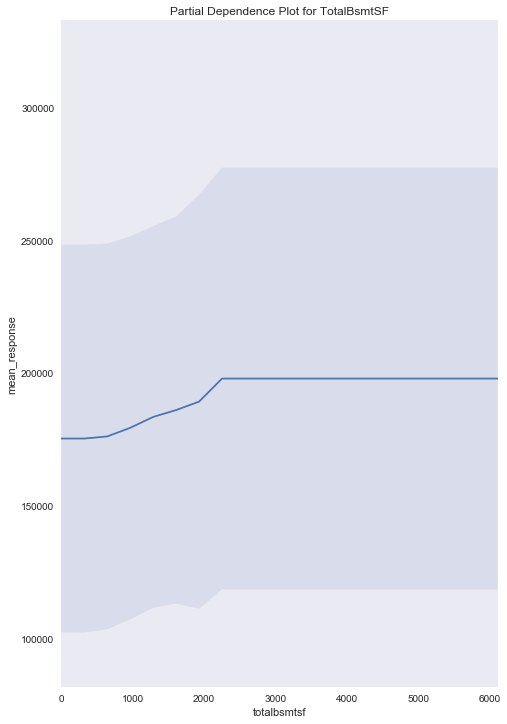

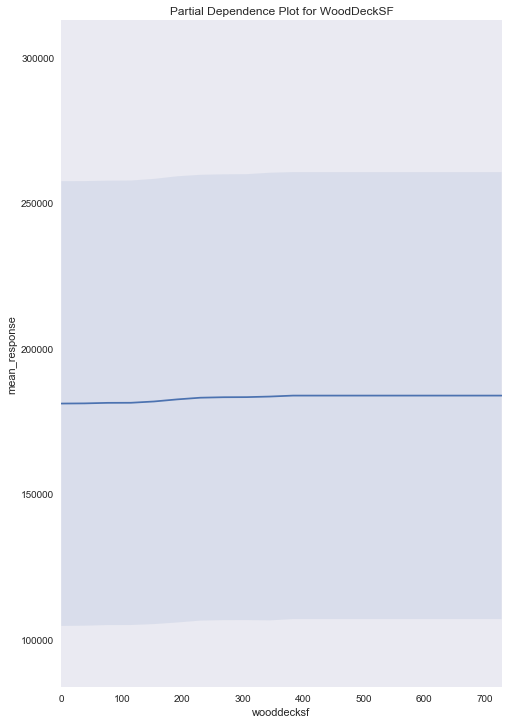

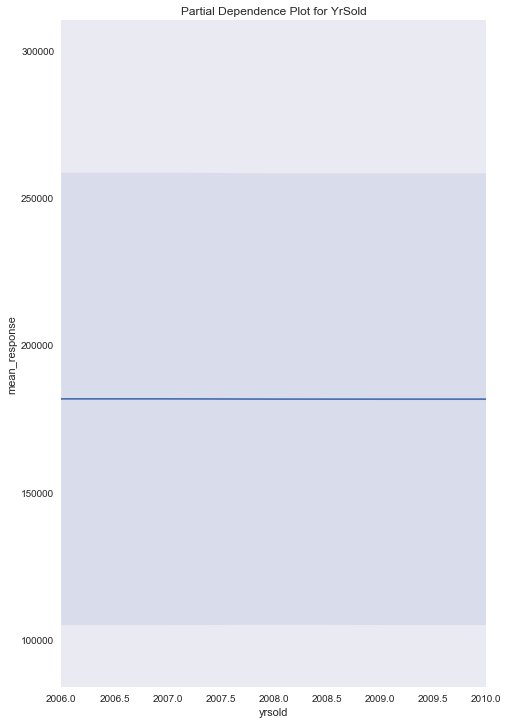

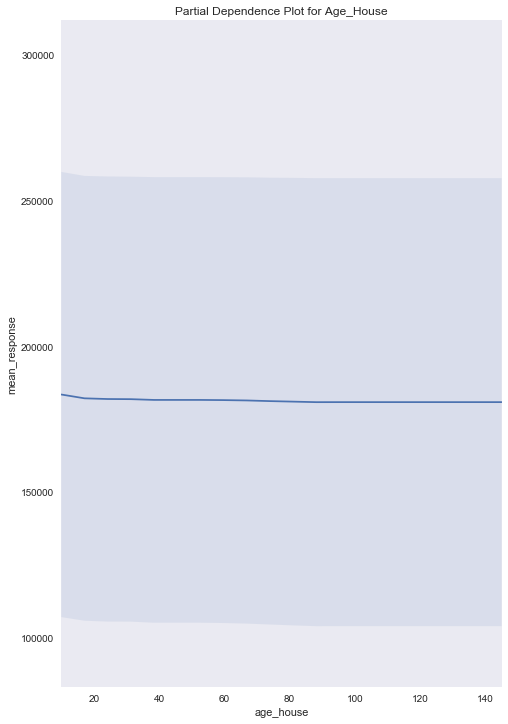

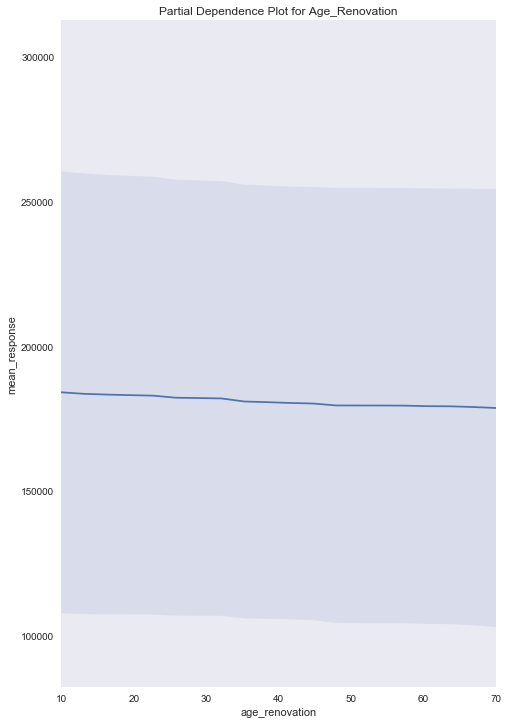

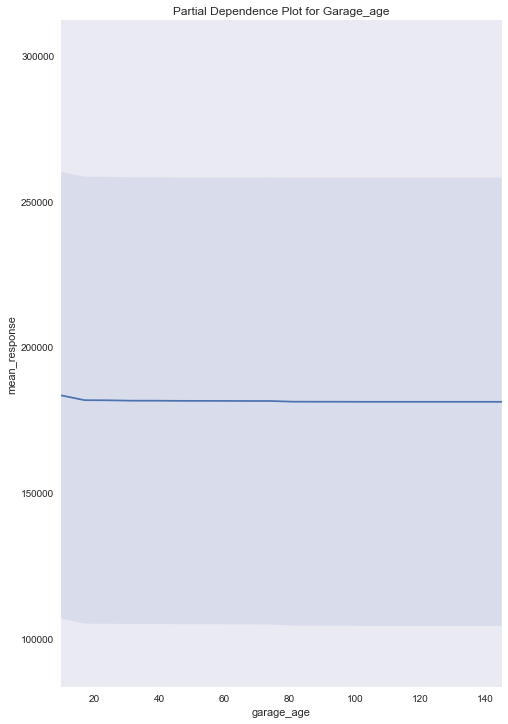

In [94]:
for i in Continuous:
    print(best_model.partial_plot(data = X_train_hf, cols = [i], server=True, plot = True))

## SURROGATE MODEL

We can use a simpler model to define our model behaviour, here i will use a simple CART decision tree

In [105]:
from sklearn.tree import DecisionTreeRegressor,tree
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.04,
random_state=SEED)
pred_pandas = h2o.as_list(preds)
test_x_dummies = pd.get_dummies(test_x)

In [106]:
dt = dt.fit(test_x_dummies,pred_pandas)

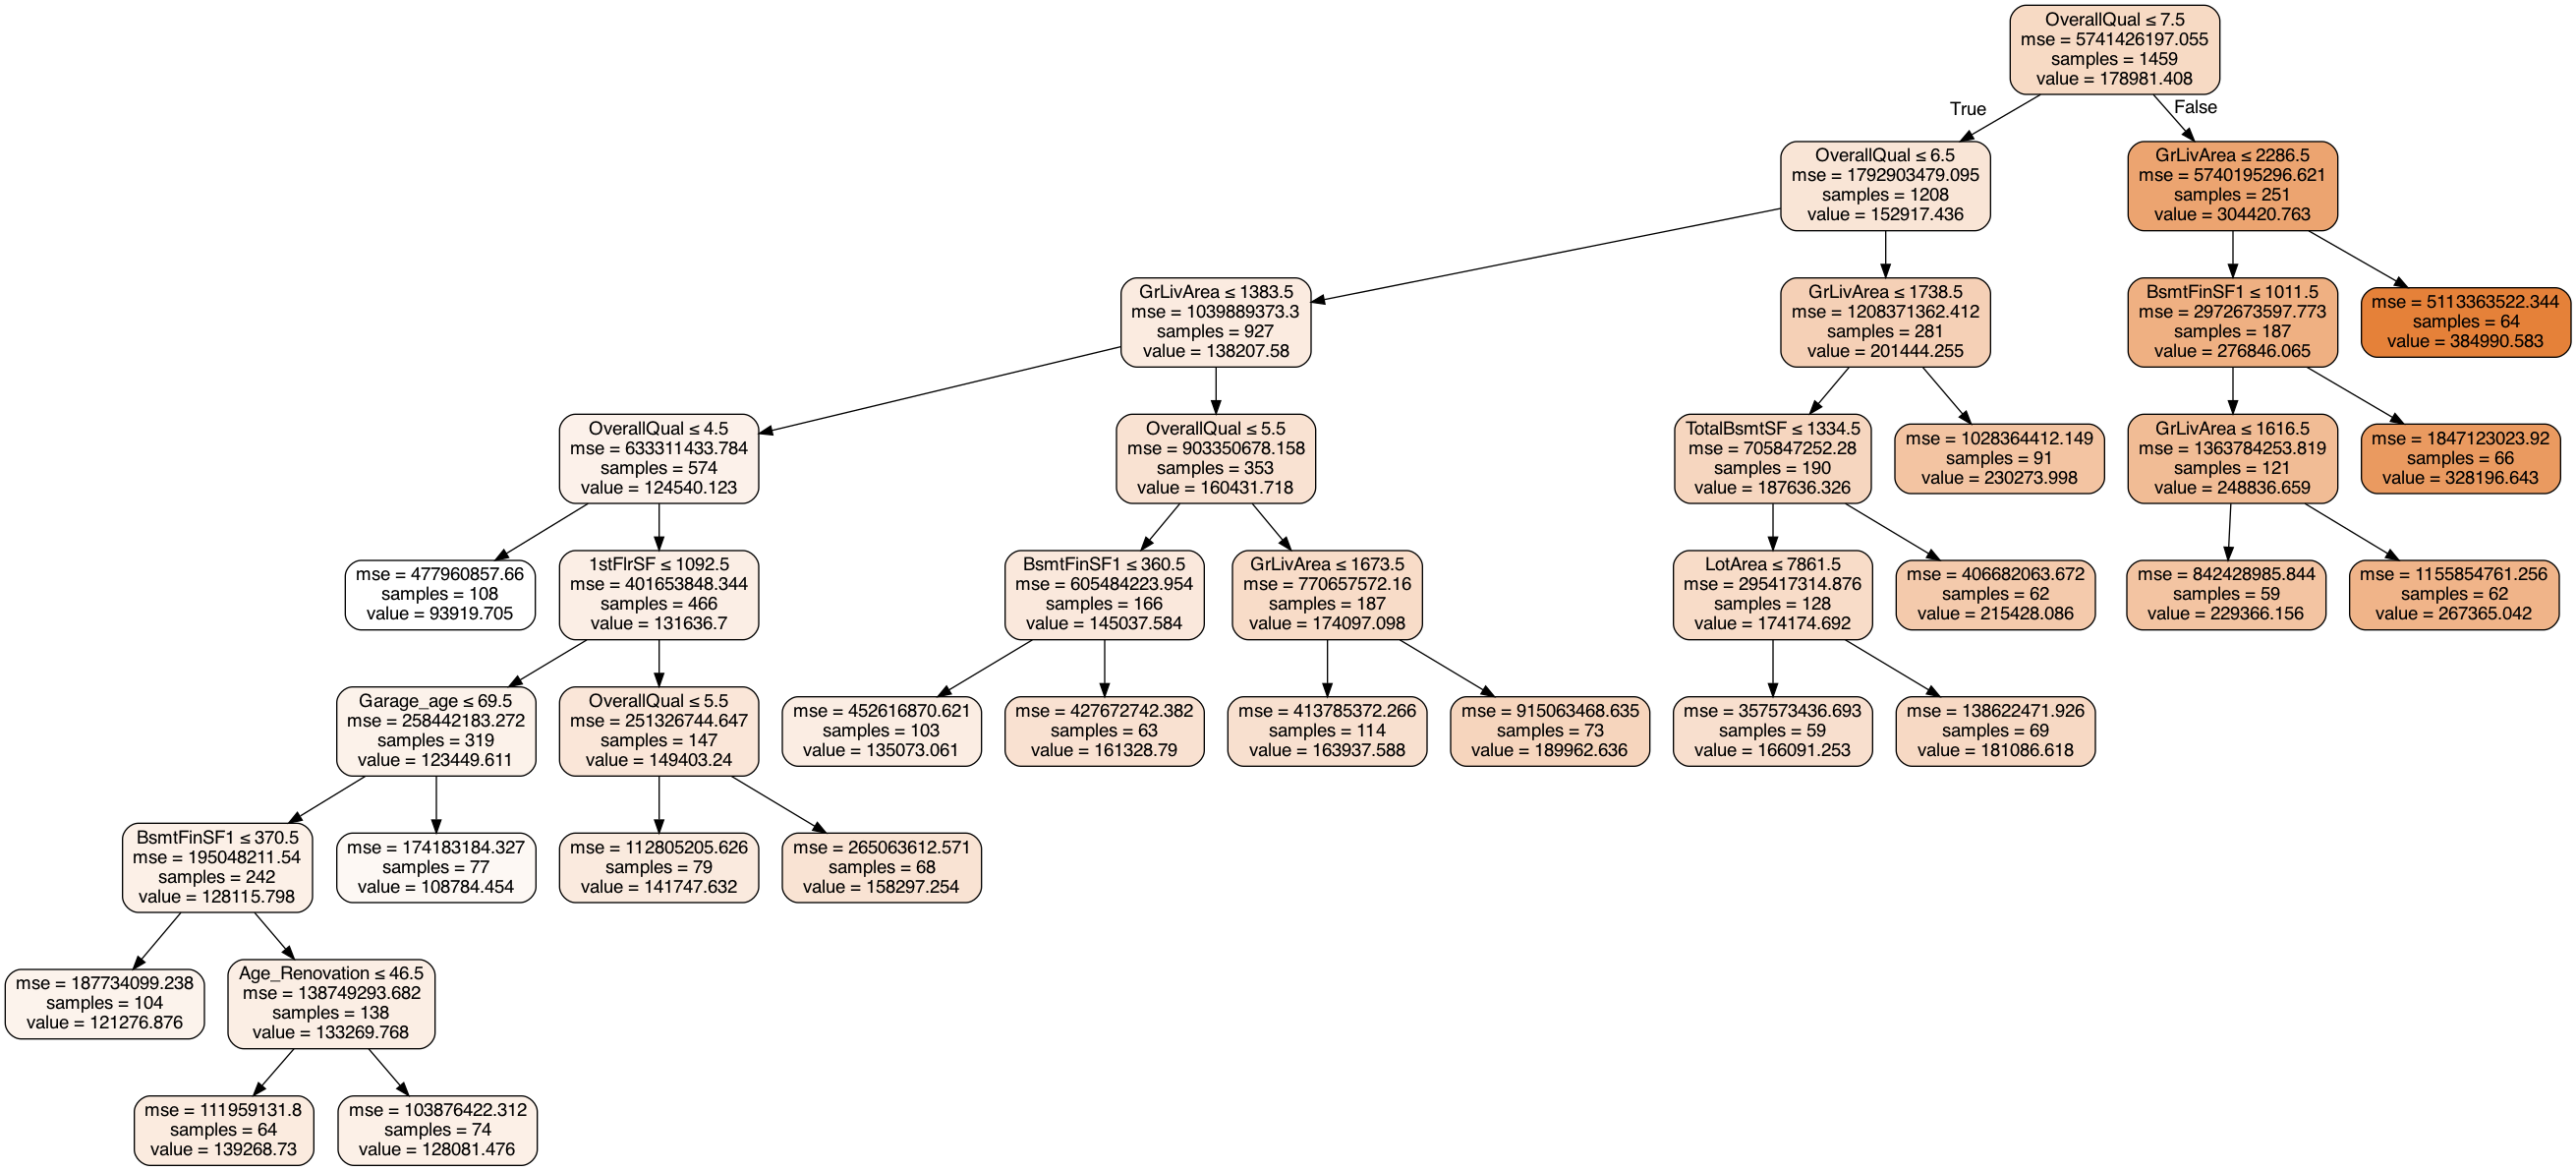

In [108]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = list(test_x_dummies.columns.values)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

## PROFESSOR METHOD 

### SHAPLEY VALUES

In [110]:
shap_contribs_hf = gbm_best.predict_contributions(X_test_hf)
shap_contribs_matrix = shap_contribs_hf.as_data_frame().values
print(shap_contribs_matrix)
print('\nShapley contributions rows = %d, columns = %d' % (shap_contribs_matrix.shape[0], shap_contribs_matrix.shape[1]))

[[-2.38418359e+03 -9.63169434e+02  0.00000000e+00 ... -1.76624036e+03
  -2.48631859e+01  1.80919406e+05]
 [ 2.63407080e+03 -6.54097900e+02  0.00000000e+00 ... -1.56740454e+03
  -9.97599030e+00  1.80919406e+05]
 [-1.20755115e+03  7.09317444e+02  0.00000000e+00 ...  1.83300330e+03
   6.24020386e+00  1.80919406e+05]
 ...
 [ 1.67937183e+03 -5.32241760e+02  0.00000000e+00 ...  3.27963135e+02
  -1.61175289e+01  1.80919406e+05]
 [-2.58677100e+03 -1.02229004e+03  0.00000000e+00 ...  3.89372131e+02
   1.42634306e+01  1.80919406e+05]
 [-2.83559351e+03  2.20209106e+03  0.00000000e+00 ...  1.77863269e+03
  -2.14951324e+01  1.80919406e+05]]

Shapley contributions rows = 1459, columns = 80


# ERRORRRRRRR!!! CRAP DON'T USE IT

### CONVERSION TO SUBMISSION FILE

In [136]:
#pred_pandas.to_csv()
sample_submission = pd.read_csv('./house-prices-data/sample_submission.csv') 
sample_submission['Pred_Saleprice']=pred_pandas['predict']
sample_submission = sample_submission.drop(['SalePrice'],axis=1)
sample_submission = sample_submission.rename(columns={"Pred_Saleprice": "SalePrice"})
sample_submission.head()
sample_submission.to_csv('sample_submission.csv',index=False)